### Import Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from tabulate import tabulate
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')

## EXPLORATORY DATA ANALYSIS 

Analysis Start with basic exploration, where we will check the dimension of the dataset. printing its data dictionary/Meta-Data. Then we will move towards the descriptive analysis, where we will explore the statistical characteristics of each variable like mean, median, ranges, quantiles, standard deviation, through these explicitly defined factors we can drive the type of distribution. These analysis is then followed by Uni-variate and Bi-variate Visualization analysis

In [3]:
train_df.head()

,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,...,registry,MZ,printables,avlength,file_type_trid,file_type_prob_trid,A,B,C,label
0,a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd...,6744064,6799360.0,524.0,3.0,0.0,1.0,1.0,0.0,1.0,...,0.0,28.0,899075.0,13.857079,Win32 EXE PECompact compressed (generic),64.2,-3.978981,5.732354,er,1
1,ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf01...,22016,45056.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,856.0,9.617978,Win32 Dynamic Link Library (generic),38.4,7.064133,5.738201,er,0
2,b0b126adc73b980a114e38027b082d149fcf491547452f...,686136,704512.0,133.0,4.0,1.0,1.0,1.0,1.0,0.0,...,0.0,2.0,32767.0,12.140422,Win64 Executable (generic),82.0,1.052727,5.722733,gow,0
3,ff6176c53ca9b58040c93870c264843b93b5e290c28e57...,8192,36864.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,678.0,9.549296,Win64 Executable (generic),28.0,2.217531,5.896053,vh,1
4,59b8bc6ac157a553440978406c8aa8eb8a25c166af1175...,396288,421888.0,133.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,5.0,35881.0,7.587439,Win64 Executable (generic),32.2,9.401164,NaN,vh,1


In [4]:
train_df.shape

(60000, 24)

From the above code we can the top 5 rows of the dataset using the head() command. and from the shape command we can see that we have 60,000 rows and 24 columns including the target variable(i.e. label)

Let's create a Meta-Data

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sha256               60000 non-null  object 
 1   size                 60000 non-null  int64  
 2   vsize                58065 non-null  float64
 3   imports              58261 non-null  float64
 4   exports              57907 non-null  float64
 5   has_debug            57073 non-null  float64
 6   has_relocations      56676 non-null  float64
 7   has_resources        58039 non-null  float64
 8   has_signature        58063 non-null  float64
 9   has_tls              57102 non-null  float64
 10  symbols              57344 non-null  float64
 11  numstrings           57282 non-null  float64
 12  paths                56340 non-null  float64
 13  urls                 57651 non-null  float64
 14  registry             57475 non-null  float64
 15  MZ                   56911 non-null 

The above table shows the total not null values along with the data type, here we can see that there are some columns whose total count of not null value is not 60,000 this mean that they have missing values. From the data types we can see that all of data types are correct.

## Descriptive Analysis

In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
size,60000.0,1.501019e+06,4.727391e+06,298.000000,107008.000000,483328.000000,1.239326e+06,3.253537e+08
vsize,58065.0,1.965704e+06,2.017881e+07,544.000000,122880.000000,421888.000000,1.601536e+06,4.278288e+09
imports,58261.0,1.061957e+02,2.134523e+02,0.000000,1.000000,28.000000,1.520000e+02,1.504700e+04
exports,57907.0,3.080327e+01,5.080795e+02,0.000000,0.000000,0.000000,0.000000e+00,4.884000e+04
has_debug,57073.0,4.037636e-01,4.906555e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
has_relocations,56676.0,5.430694e-01,4.981460e-01,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00
has_resources,58039.0,8.604559e-01,3.465164e-01,0.000000,1.000000,1.000000,1.000000e+00,1.000000e+00
has_signature,58063.0,2.541894e-01,4.354083e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
has_tls,57102.0,2.341949e-01,4.234983e-01,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
symbols,57344.0,4.017247e+01,1.239702e+03,0.000000,0.000000,0.000000,0.000000e+00,1.816600e+05


The above table shows the summary statistics of each numerical columns. Such as the minimum and maximum values, standard deviation, total count and 1st, 2nd, and 3rd quantiles. This describe function treats the column as numerical which have numerical values in it, irrespective of the fact that they are logically categorical. for example, the label column is the categorical column have only 2 value 0 or 1. but due the numeric nature of the value this function treats it as categorical. From the above table we can observe that: 
- In the size column, the values ranges from 298 to 3.253537e+08 where the mean value is 1.501019e+06
- In the vsize column, the values ranges from 544 to 4.278288e+09 where the mean value is 1.965704e+06
- In the import column, the values ranges from 0 to 1.504700e+04 where the mean value is 1.061957e+02. by comparing the mean value with the median value we can see that the distribution is positively skewed.
- In the export column, the values ranges from 0 to 4.884000e+04 where the mean value is 3.080327e+01. by comparing the mean value with the median value we can see that the distribution is positively skewed.
- In the has_debug column, the value ranges for 0 to 1, and from all 3 quantiles values we can see that there is no other value except 0 and 1. this indicate that this column is a categorical variable with only 2 values
- In the has_relocations column, the value ranges for 0 to 1, and from all 3 quantiles values we can see that there is no other value except 0 and 1. this indicate that this column is a categorical variable with only 2 values
- In the has_resources column, the value ranges for 0 to 1, and from all 3 quantiles values we can see that there is no other value except 0 and 1. this indicate that this column is a categorical variable with only 2 values
- In the has_signature column, the value ranges for 0 to 1, and from all 3 quantiles values we can see that there is no other value except 0 and 1. this indicate that this column is a categorical variable with only 2 values
- In the has_tls column, the value ranges for 0 to 1, and from all 3 quantiles values we can see that there is no other value except 0 and 1. this indicate that this column is a categorical variable with only 2 values
- In the symbols column, the value ranges from 0 to 1.816600e+05, where the mean value is 4.017247e+01. by comparing the mean value with the median value we can see that the distribution is positively skewed.
- In the numstrings column, the value ranges from 1 to 1.572261e+06, where the mean value is 7.404344e+03. by comparing the mean value with the median value we can see that the distribution is positively skewed.
- In the paths column, the value ranges from 0 to 5.324e+03, where the mean value is 1.644799. by comparing the mean value with the median value we can see that the distribution is positively skewed.
- In the urls column, the value ranges from 0 to 9.387e+03, where the mean value is 1.250129e+01. by comparing the mean value with the median value we can see that the distribution is positively skewed.
- In the MZ column, the value ranges from 1 to 7.01e+3, where the mean value is 1.626343e+01. by comparing the mean value with the median value we can see that the distribution is positively skewed.
- In the printables column, the values ranges from 5 to 5.034687e+07 where the mean value is 1.207710e+05. by comparing the mean value with the median value we can see that the distribution is positively skewed.
- In the avlength column, the values ranges from 5 to 2.079909e+05 where the mean value is 3.265851e+01. by comparing the mean value with the median value we can see that the distribution is positively skewed.
- In the file_type_prob_trid column, the values ranges from 17.500000 to 1.000000e+02 where the mean value is 5.367875e+01. by comparing the mean value with the median value we can see that the distribution is positively skewed.
- In the A column, the values ranges from -17.783199 to 4.392660e+01 where the mean value is 4.015404. by comparing the mean value with the median value we can see that the distribution is positively skewed.
- In the B column, the values ranges from 0.004929 to 6.584937 where the mean value is 5.810361.
- In the label column, the value ranges for 0 to 1, and from all 3 quantiles values we can see that there is no other value except 0 and 1. this indicate that this column is a categorical variable with only 2 values

In [7]:
train_df.describe(include="O").T

,count,unique,top,freq
sha256,60000,60000,a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd...,1
file_type_trid,60000,89,Win64 Executable (generic),10085
C,57949,7,vh,23226


The above table shows the statistical summary of the categorical variables, Like total count, total number of unique values, most occured value (i.e. top value) along with their frequency. Here we can see that:
- the sha256 have total 60,000 unique values this indicate that this column is the id column of this dataset and each row have a unique sha256 value
- the file_type_trid have 89 unique values amoung which Win64 Executable (generic) is the mostly occured value with its frequencies is 10065
- the C column have 7 unique values amoung which vh is the top value whose frequency is 23226.

#### Checking total Unique value

In [8]:
train_df.nunique()

sha256                 60000
size                   27339
vsize                   3302
imports                 1090
exports                  817
has_debug                  2
has_relocations            2
has_resources              2
has_signature              2
has_tls                    2
symbols                  415
numstrings             13919
paths                    168
urls                     412
registry                  57
MZ                       556
printables             33907
avlength               44462
file_type_trid            89
file_type_prob_trid      728
A                      56296
B                      49132
C                          7
label                      2
dtype: int64

From the above plot we can see that total number of unique values for each column. From these values we can see that the has_debug, has_relocation, has_resoucres, has_signature, has_tls and labels are all the categorical variables.

# Visualization 

Lets visualize the patterns of each column. 

the below code is used to set the standard size of plot

In [9]:
sns.set(rc={'figure.figsize':(15.7,8.27)})

### Uni Variant Analysis

Here we will visualize the pattern of each column seperately, to see how the values are distributed in each column. for this we will first manually separate the categorical and numerical variable. Since sha256 is the id column so we will not include it in the visualization as it will not have any useful pattern.

In [10]:
categorial = ['has_debug','has_relocations','has_resources','has_signature','has_tls','file_type_trid','C','label']
numerical = ['size', 'vsize', 'imports', 'exports', 'symbols',
       'numstrings', 'paths', 'urls', 'registry', 'MZ',
       'printables', 'avlength', 'file_type_prob_trid', 'A', 'B']

**Categorical Plot**

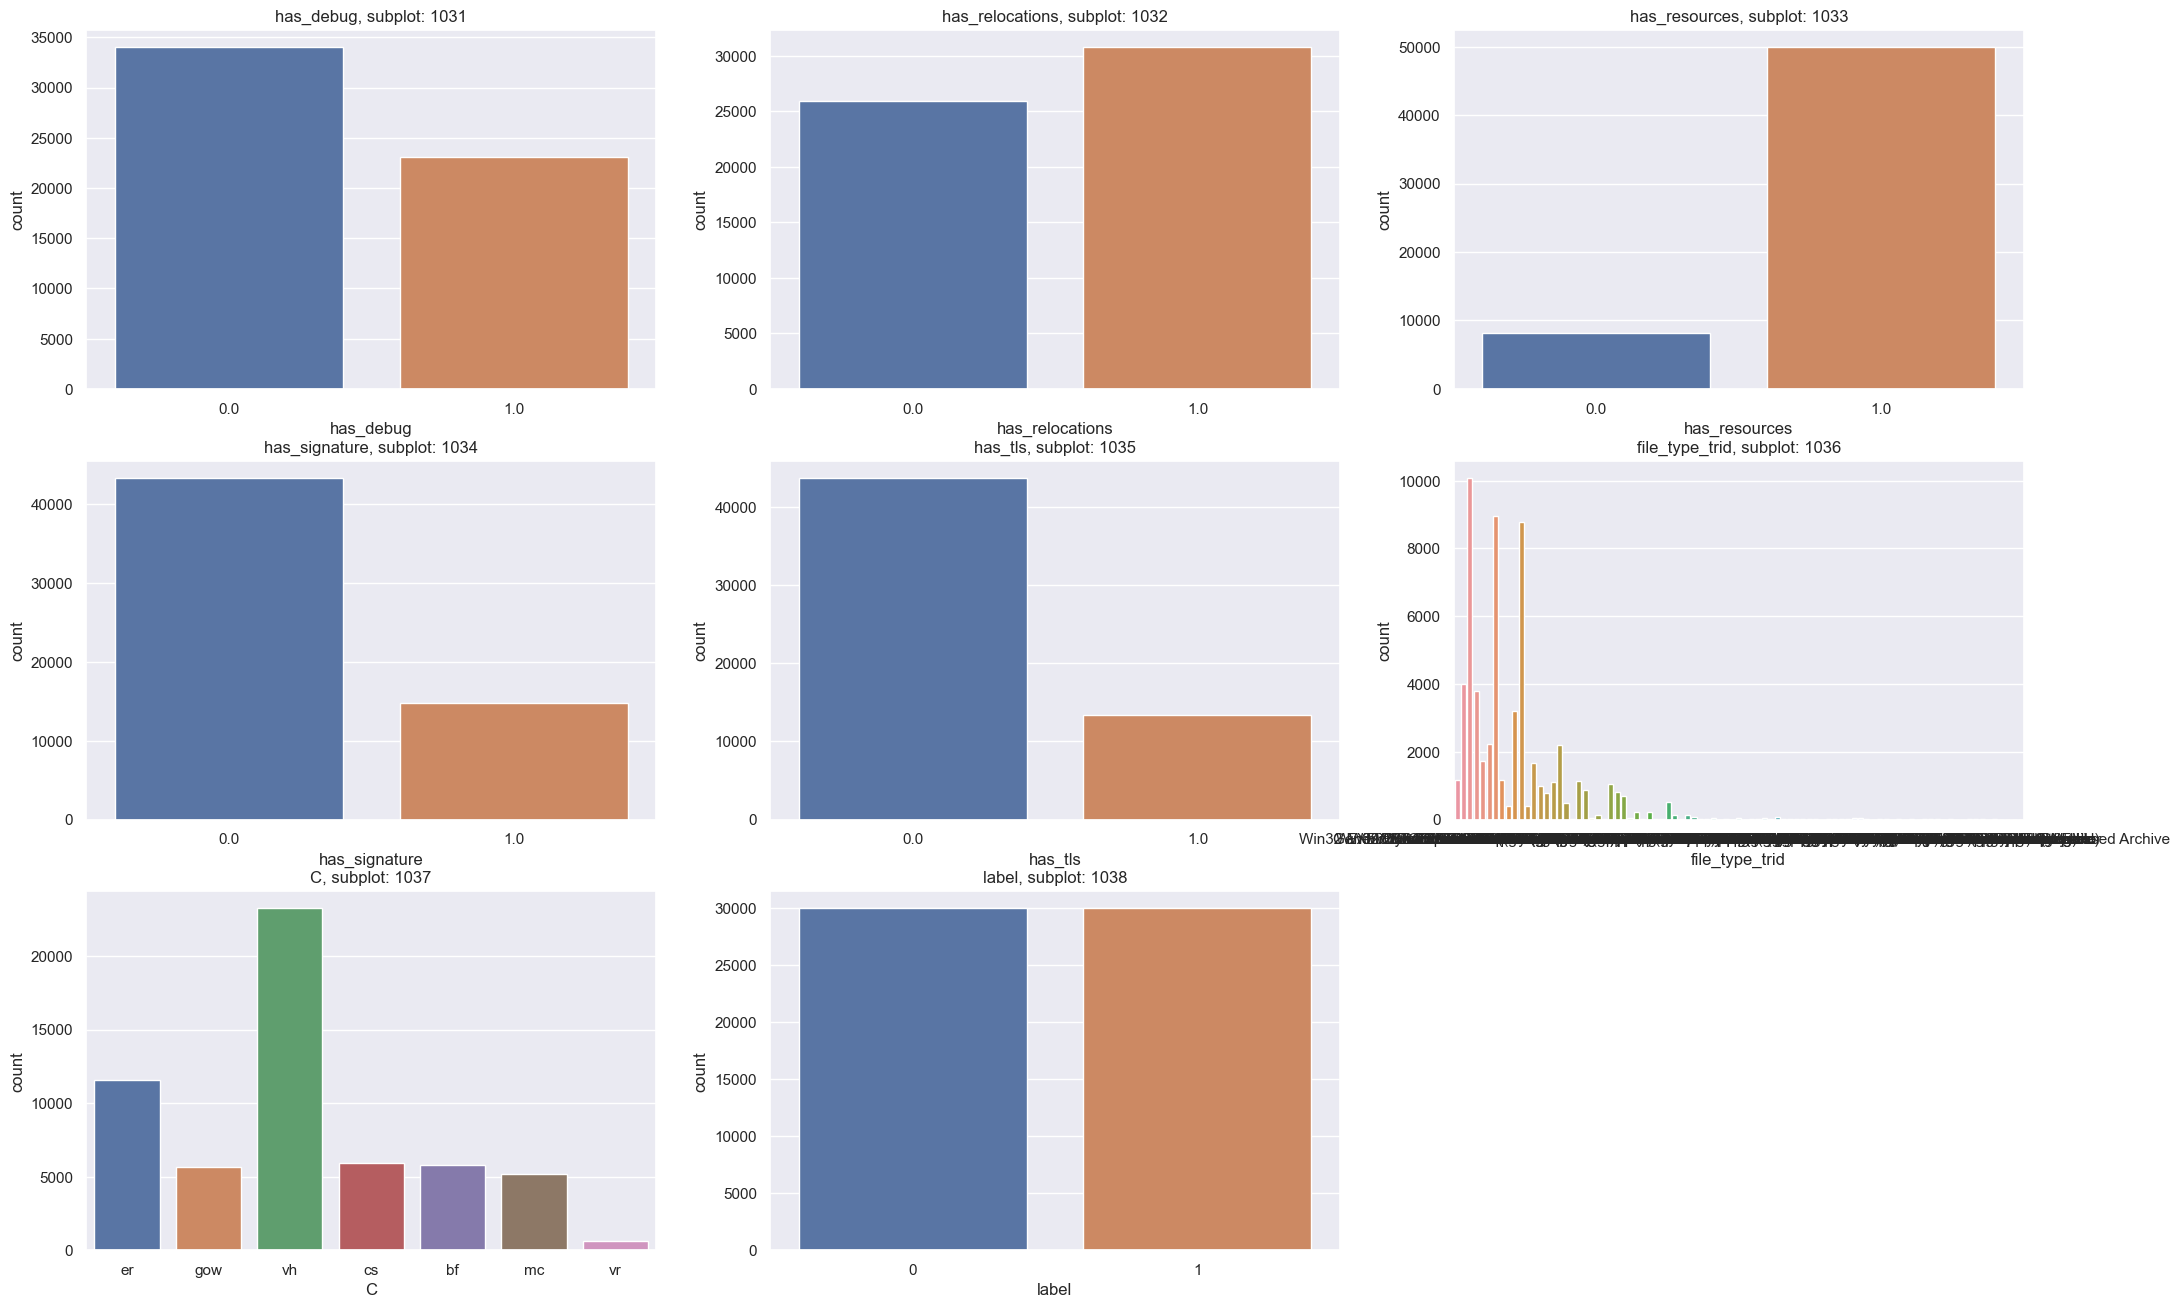

In [11]:
a=10
b=3
c=1
fig = plt.figure(figsize=(25,55))
for i in categorial:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(data = train_df, x= i)
    c = c + 1

Above are the count plots for each categorical. From the above plot we can see how the values of the categorical variables are distributed. Here we can see that:
- In the Has-debug column, there are only 2 value 0 and 1. among the 0 have occured more compare to 1
- In the has_relocation column, there are only 2 values and among them 1 have occured more compared to 0.
- The has_resource column mostly have 1 value  and rarely have 0
- The has_signature columne mostly have 0 value compare 0
- In the Has_tls column, 0 have occured more compare to 1
- From the file_type_trid column we can't extract any pattern as its plot is not very clear. For this we will plot another plot we have a much clear picture of it
- In the column C, there are 7 values, among which vh have appeared the most, after that er have appeared the most. as the least occuring value of C is vr. beside these 3 values the other 4 values that is gow, cs, bf, and mc. have frequencies around 5000
- In the label column there are only 2 value that is 0 and 1. and frequency of occurances of both values are equal.

Lets further look at these frequencies in terms of pie chart where we can can compare these values in terms of percentage.

**Pie Chart on Categorical Variable**

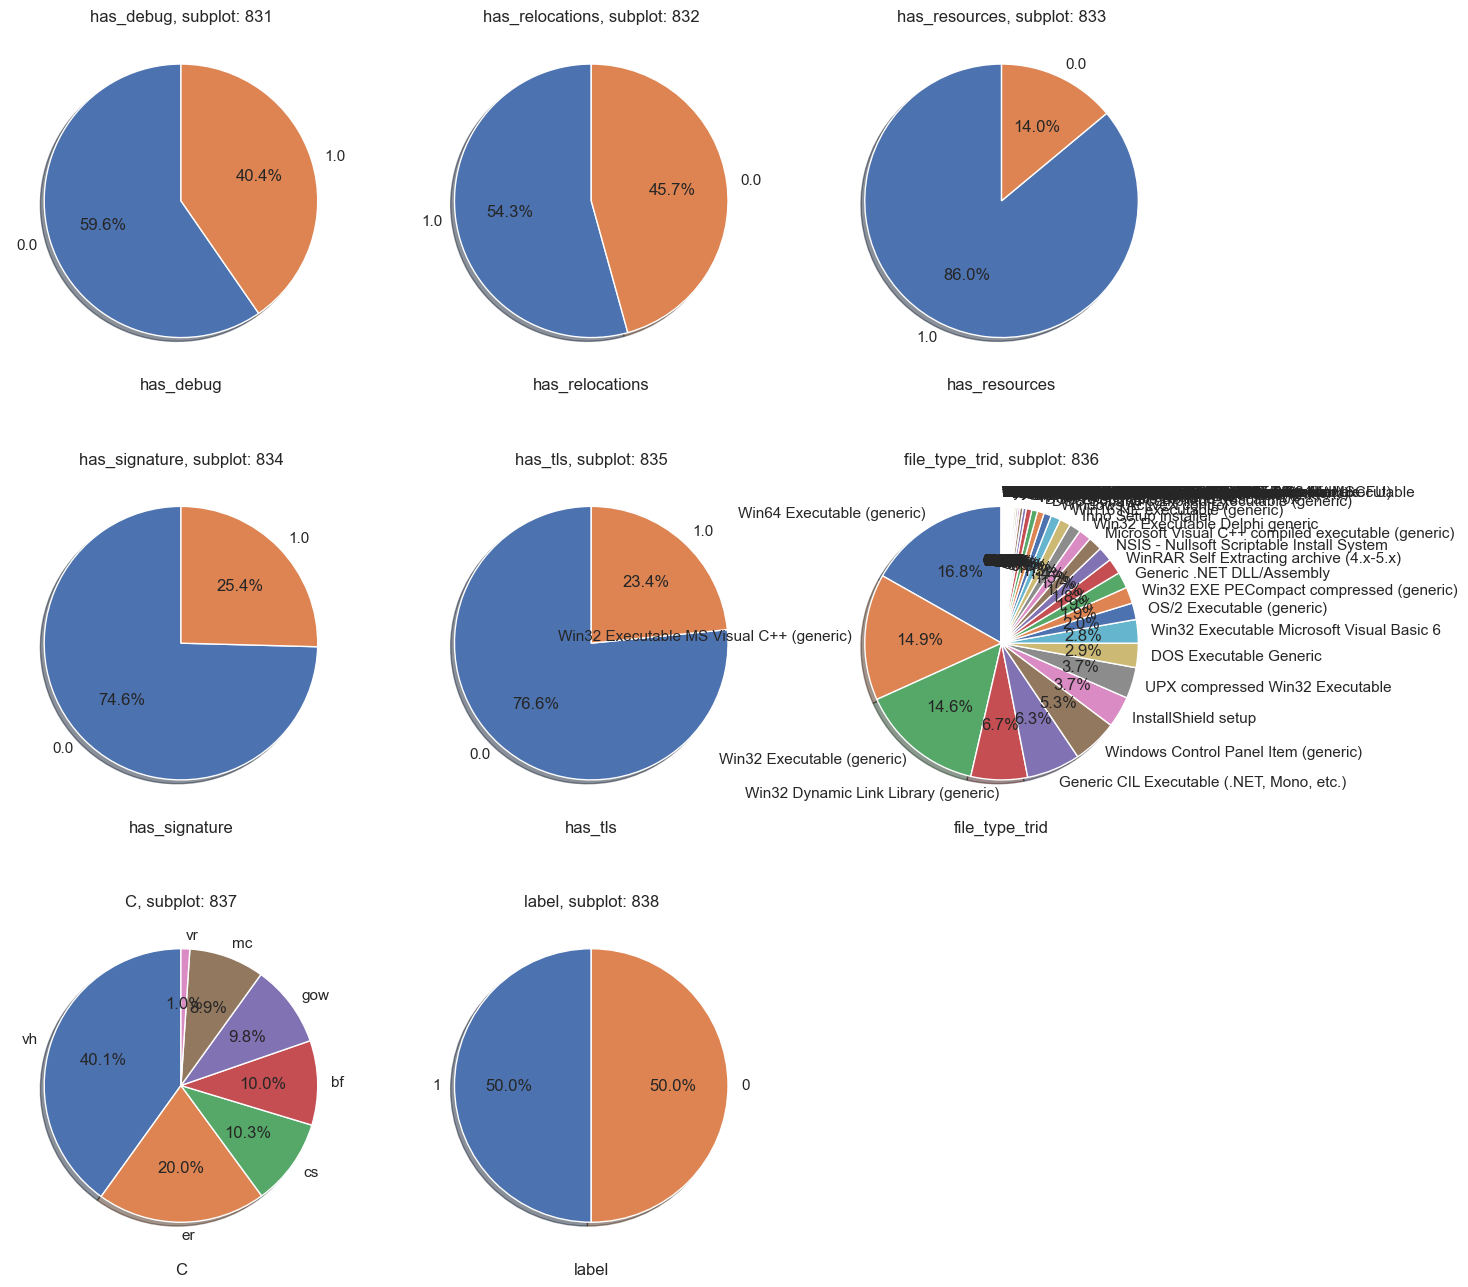

In [12]:
a=8
b=3
c=1
fig = plt.figure(figsize=(15,45))
for i in train_df[categorial]:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.pie(train_df[i].value_counts(),autopct='%1.1f%%',startangle=90,shadow=True,
            labels=train_df[i].value_counts().keys().values)
    c = c + 1

The above plot gives a clear picture in terms of percentage. From these pie chart we can get some details about the file_type_trid column. From it plot we can see that, win64 Executable (generic), win32 Executable MS Visual C++(generic), win32 Executable (generic), win32 Dynamic Link library(generic) and Generic CIL Executable(.NET,Mono,etc.) are the the top mostly occured file type. 

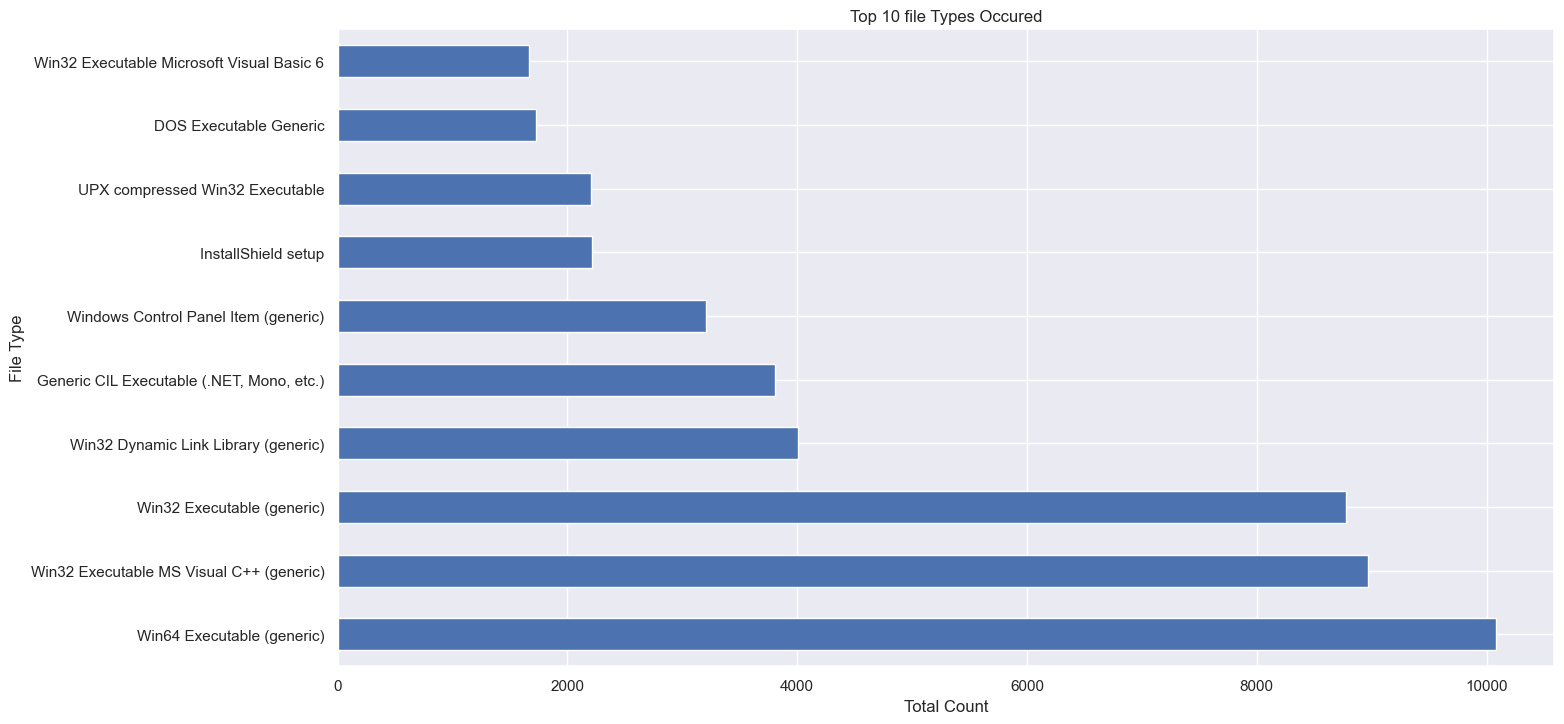

In [13]:
train_df['file_type_trid'].value_counts().head(10).plot(kind='barh');
plt.title('Top 10 file Types Occured');
plt.xlabel('Total Count');
plt.ylabel('File Type');

Above are the top 10 file types that are mostly occured.

**Distribution of Numerical Plot**

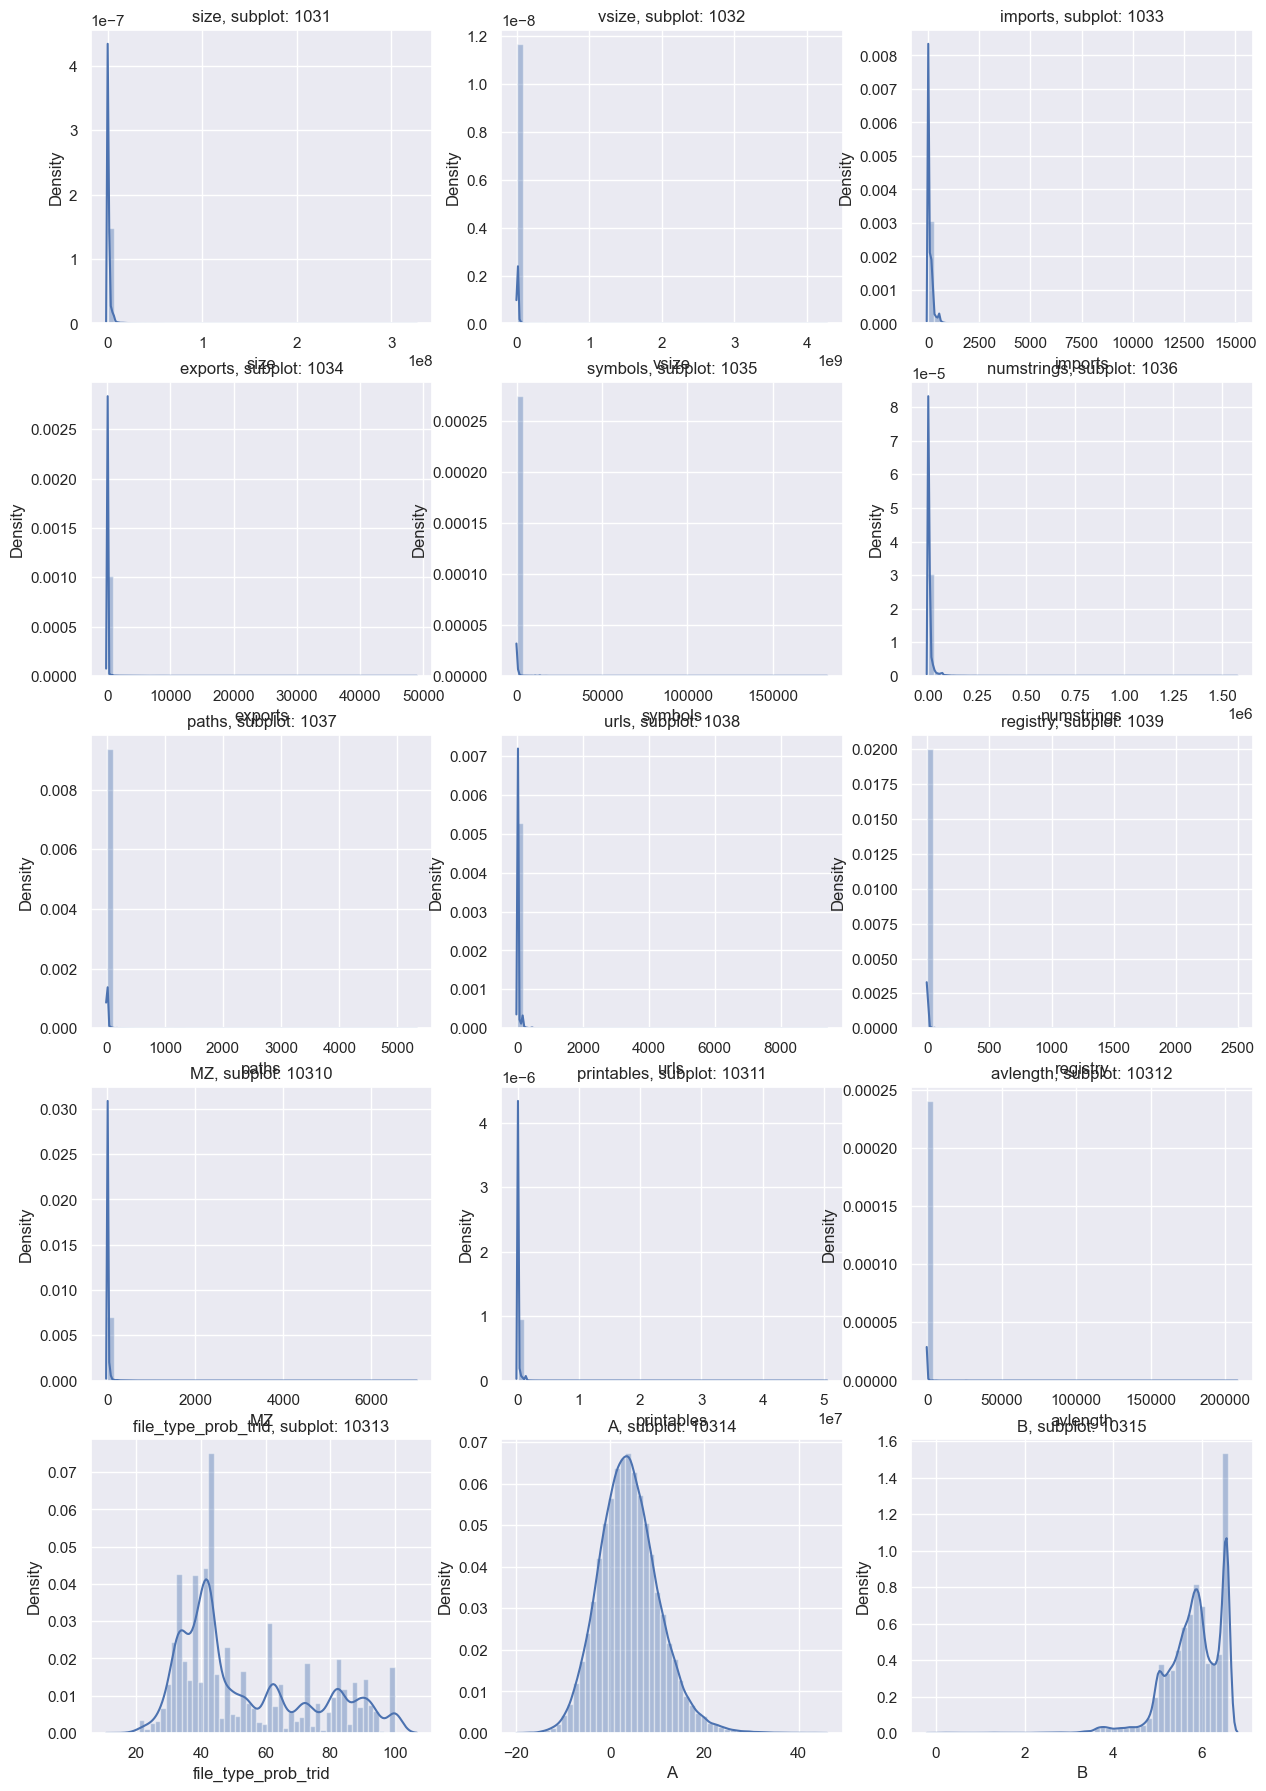

In [14]:
a=10
b=3
c=1
fig = plt.figure(figsize=(15,45))
for i in numerical:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(train_df[i])
    c = c + 1

The above plot shows the distribution of each numerical variable, each numerical variable have its own distribution plot. From the above plot we can see that:
- In size, vsize, import, export, symbols, numstring, paths, urls, registry, MZ, printables and avlength columns, the peak forms at the 0 and the its skewed towards the right side, this mean that they have positively skewed distribution and have outliers on the right side of the plot, which mean they have high valued outliers. 
- the file_type_prob_trid values are distributed over the range of 20 to 120. where the peak forms at the 40. it have a flat dstribution which is distributed over region
- the A column have normal distribution plot which is slightly shifted towards the left, but it still forms the bell shaped curve. 
- the B columns have values distributed over the range of 0 to 8. and the peak forms at the 8. Here the values are skewed towards the left, this make it negatively skewed distribution, which might have low valued outliers.

### Bi-Variant Visualization 

Let's visualize the each column in terms of Label, and see how the values of each variables varies with the target variable.

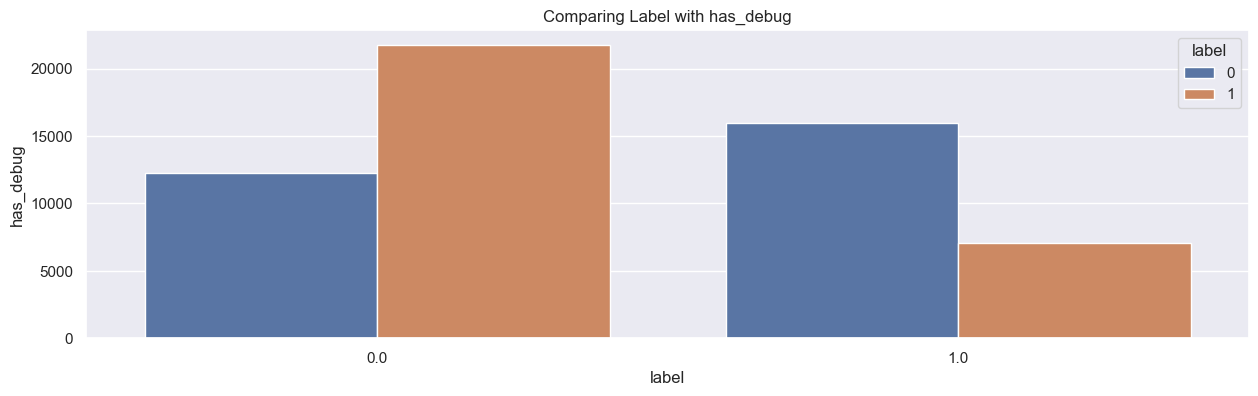

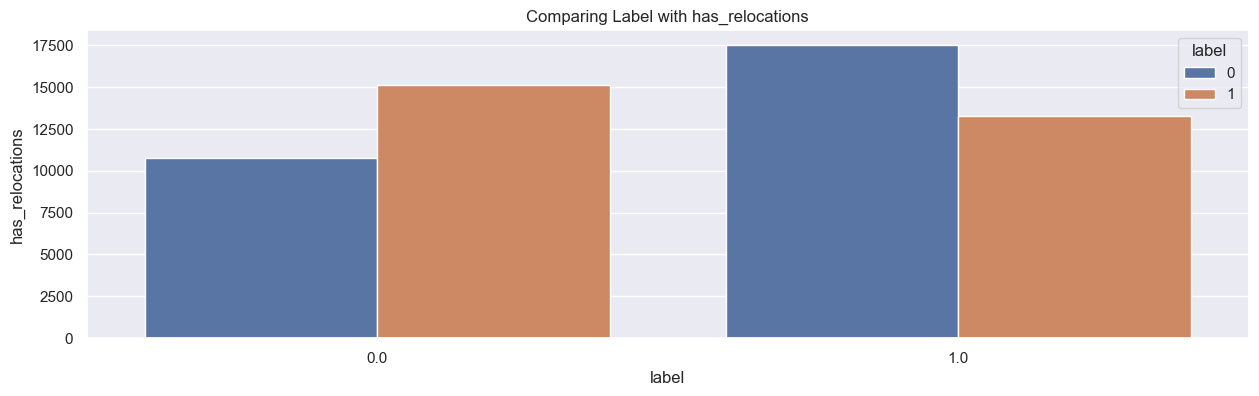

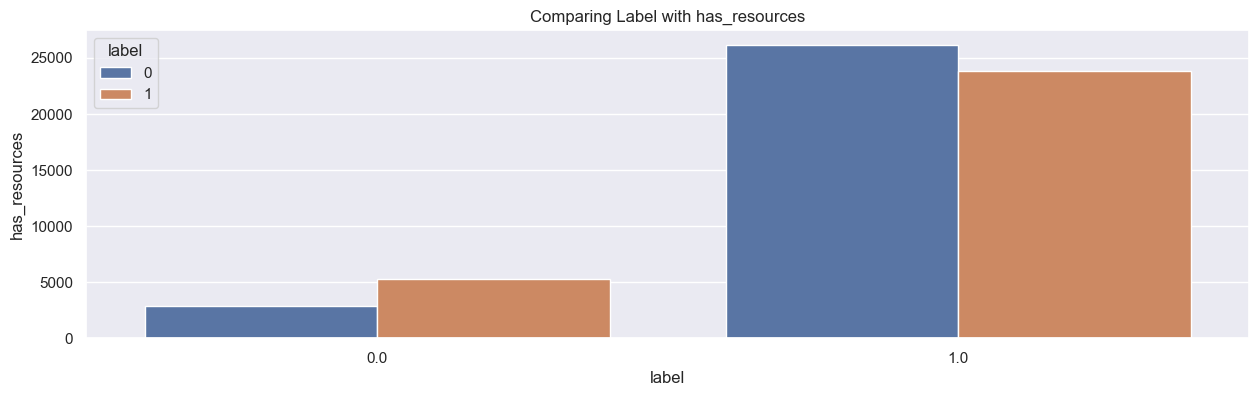

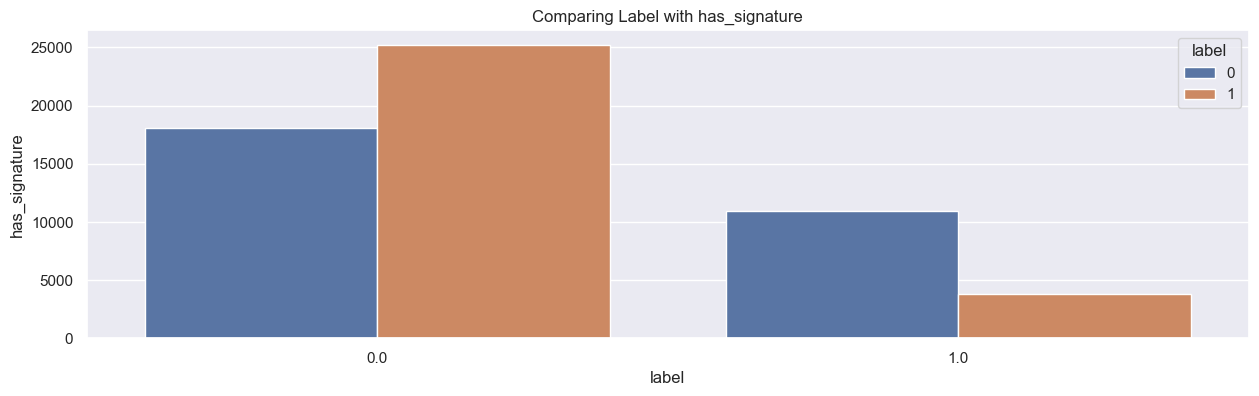

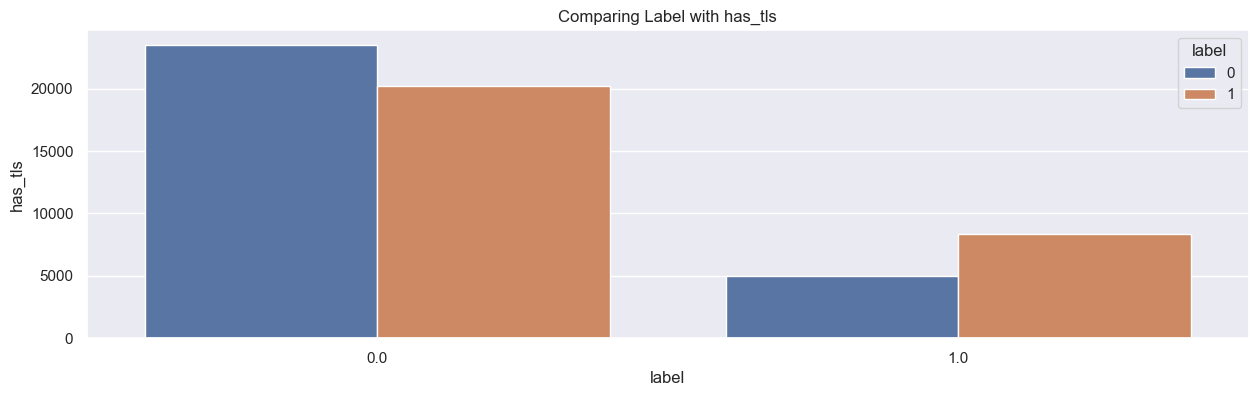

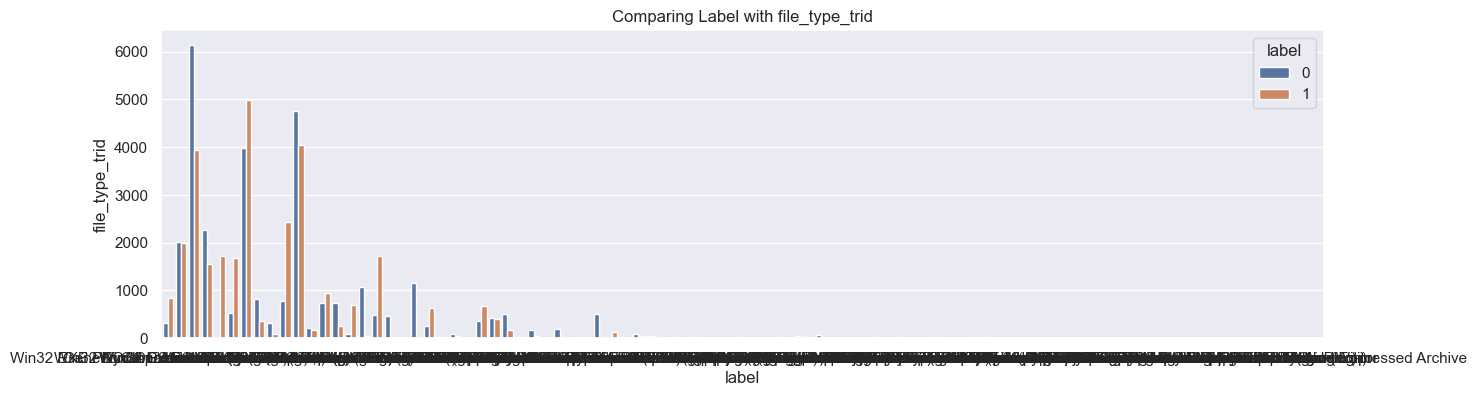

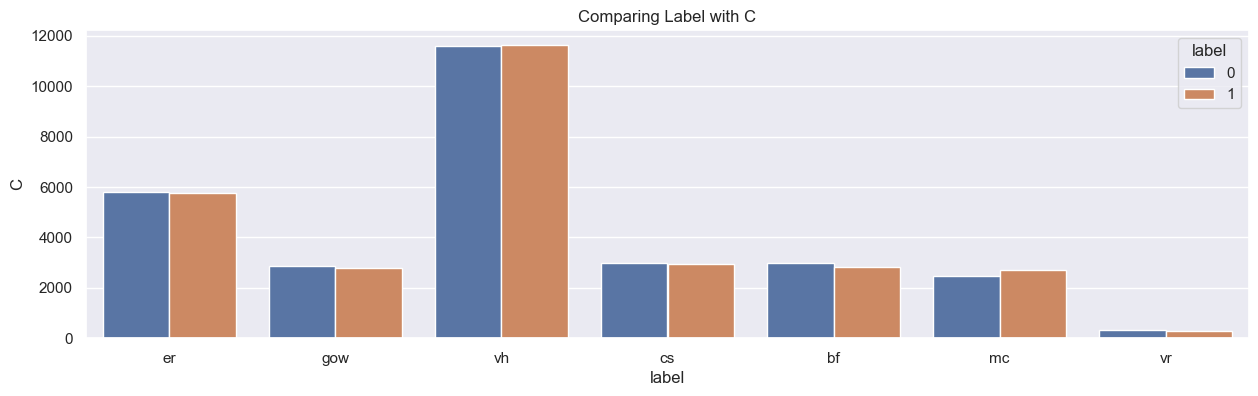

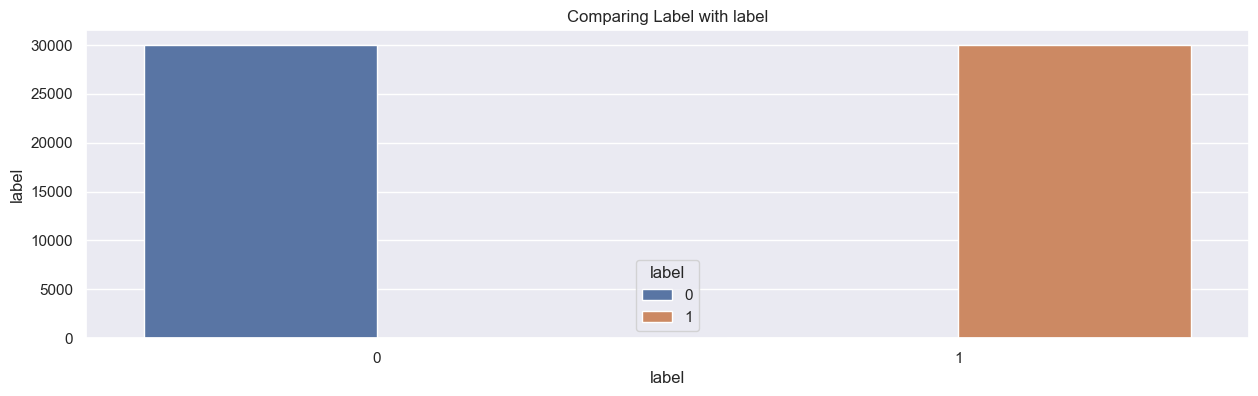

In [15]:
for i in categorial:
    fig , ax=plt.subplots(figsize=(15,4))
    sns.countplot(train_df, x=i, hue= 'label')
    ax.set_ylabel(i)
    ax.set_xlabel("label")
    ax.set_title(('Comparing Label with {}').format(i))

The above plot compare the values of categorical variable with the label variables through the count plot. Here we can see that:
- the has_debuge column have more 0 values for the when the label is 1 and the more 1 value when the label is 0.
- the has_relocation column have more 0 values when the label is 1 and more 1 values when the label is 0
- the has_ resource have more 0 values when the label is 1 and more 1 value the label is 0
- from the has_signature column we can see that when the has signature have 0 value it is more likely that the label will be 1 and the when the has signature have 1 value it is more likely that label have 0  value.
- from the has_tls column we can see that when the has_tls have 0 value it is more likely that the label will be 0 and the when the has_tls have 1 value it is more likely that label have 1  value.
- from the the C column we can see that the C have no impact on the label, as the 0 and 1 bar of label is balance in all of the values of the C column.


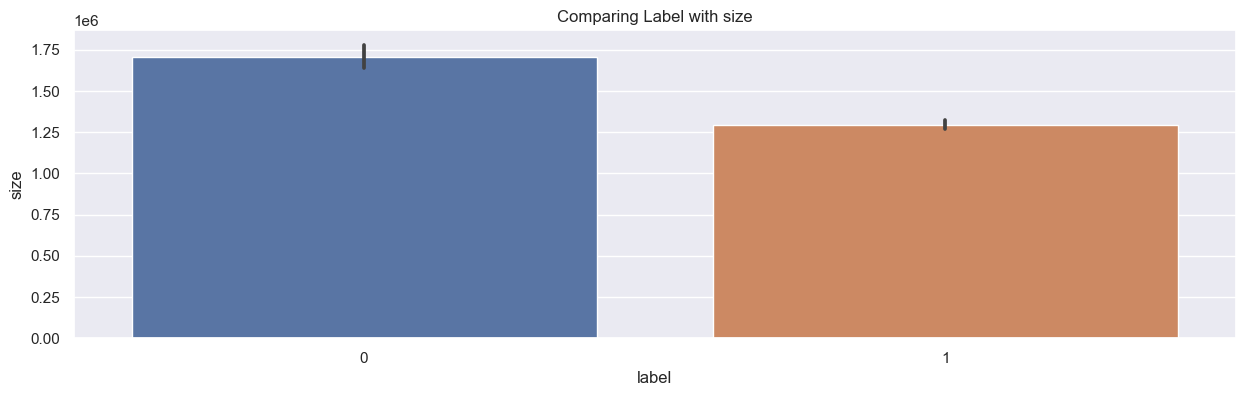

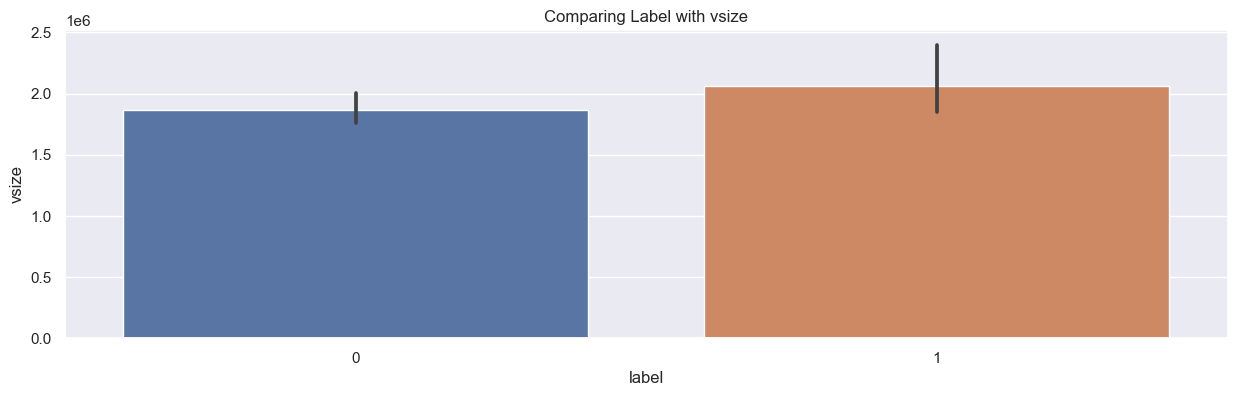

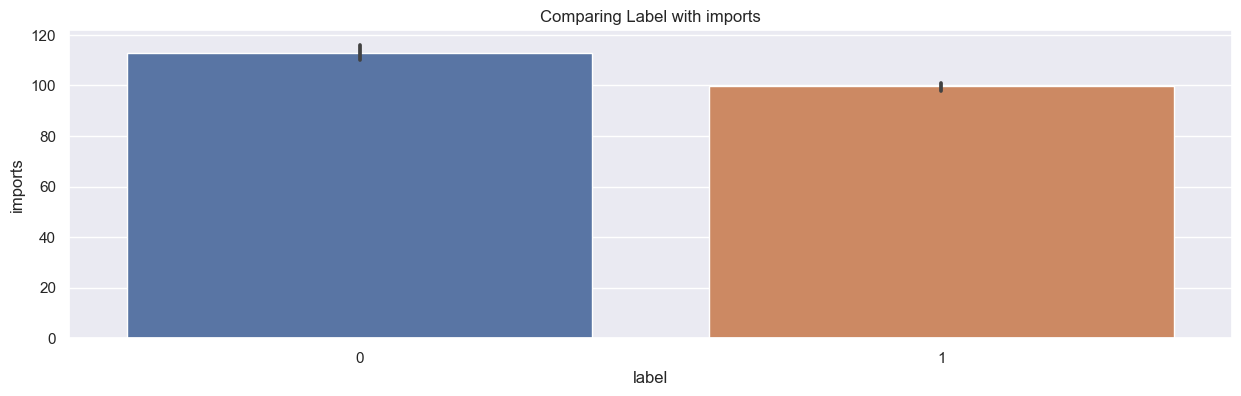

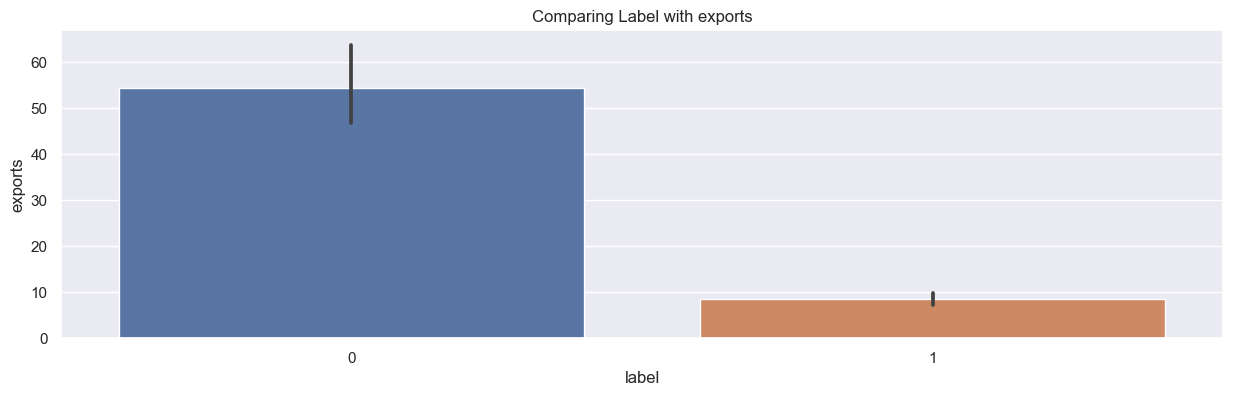

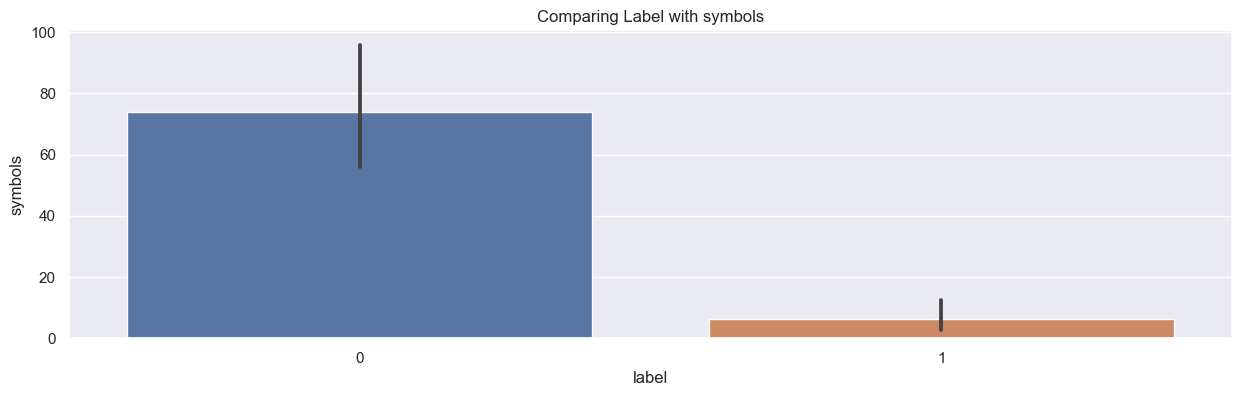

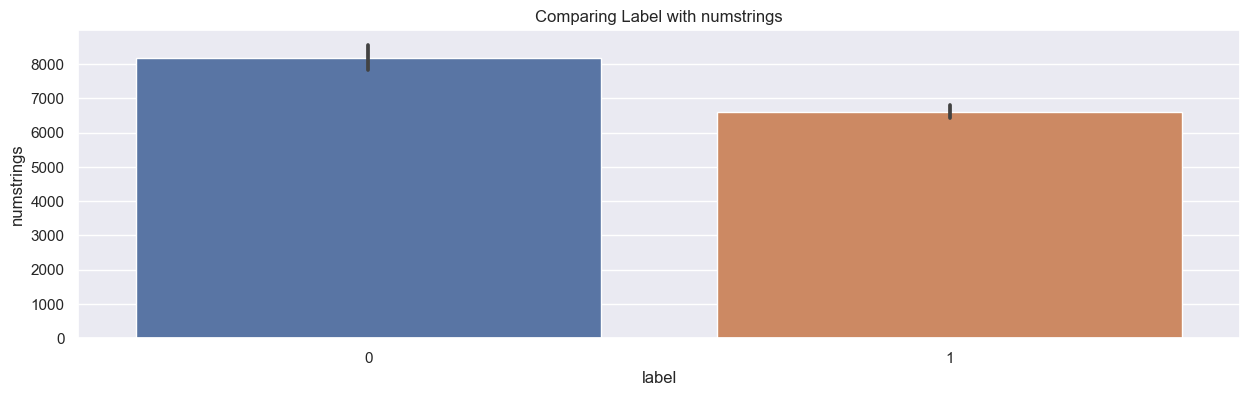

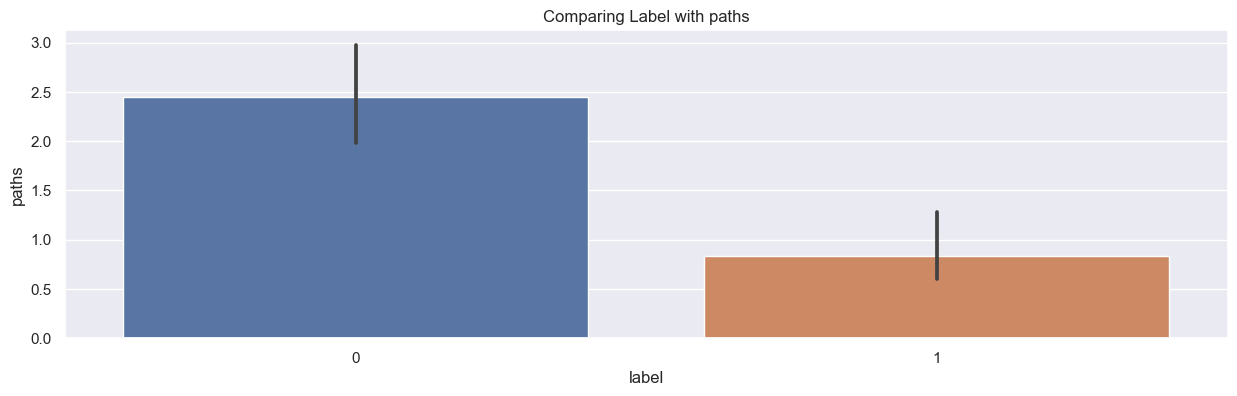

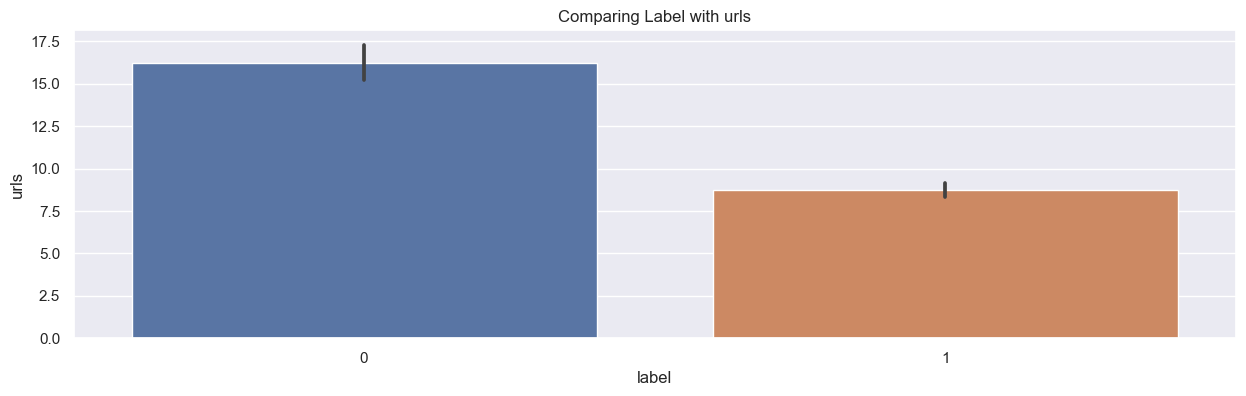

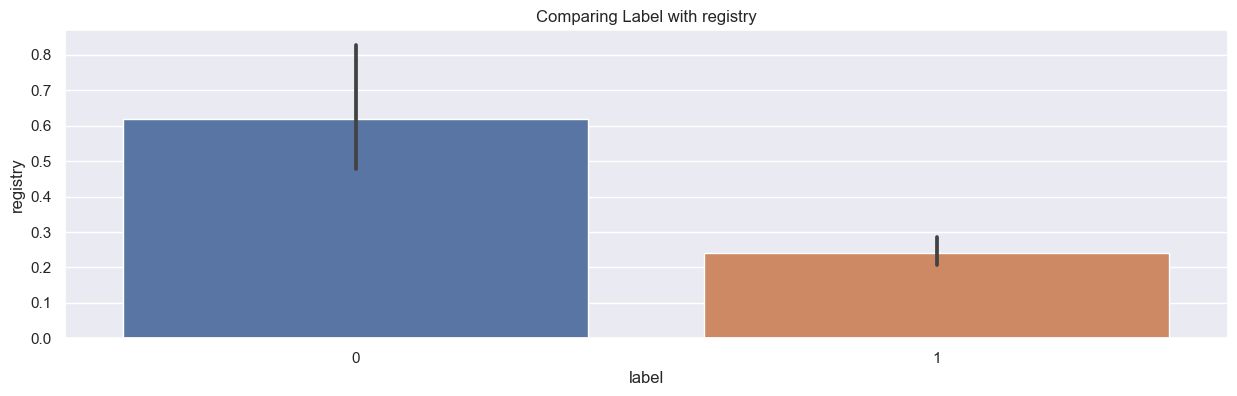

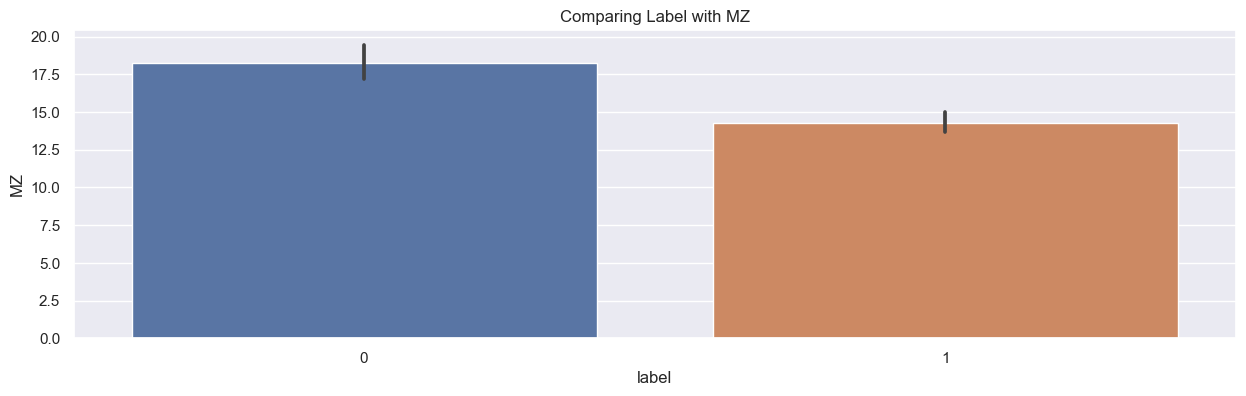

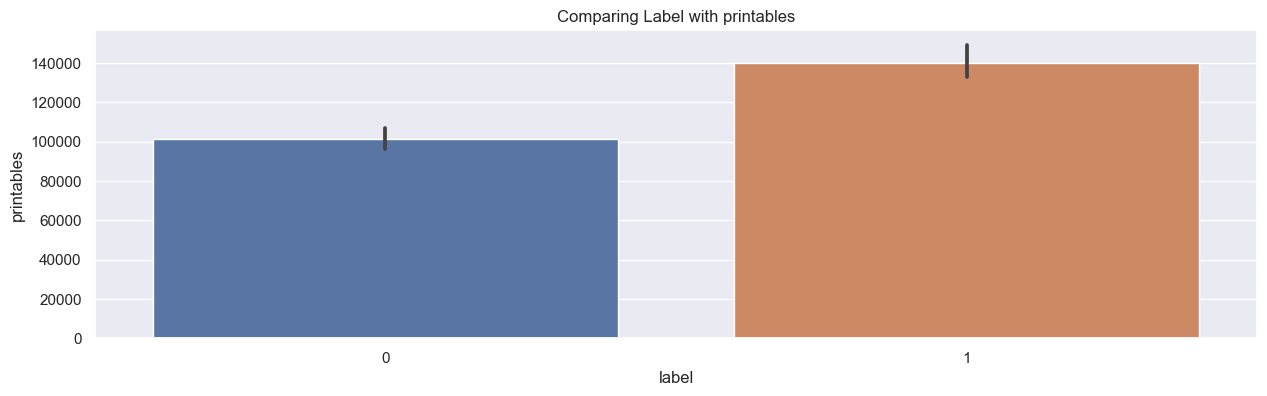

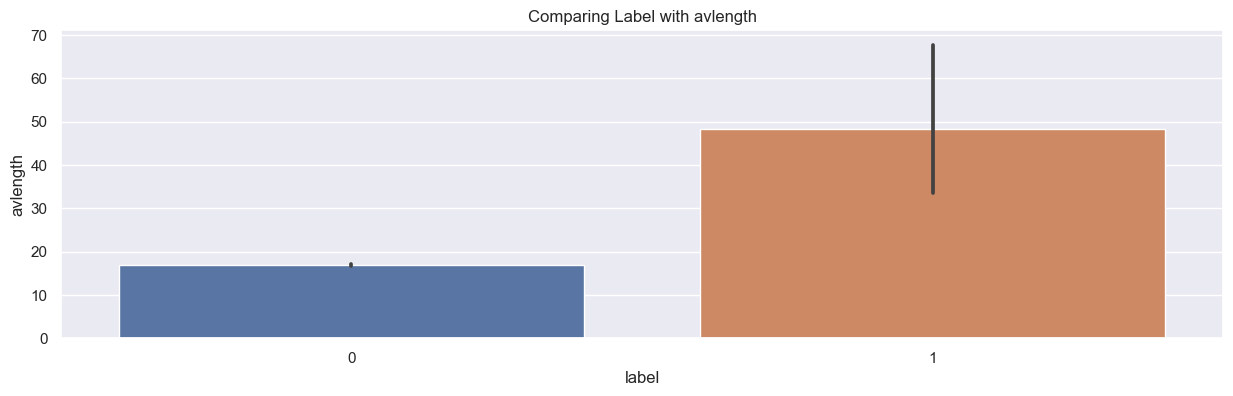

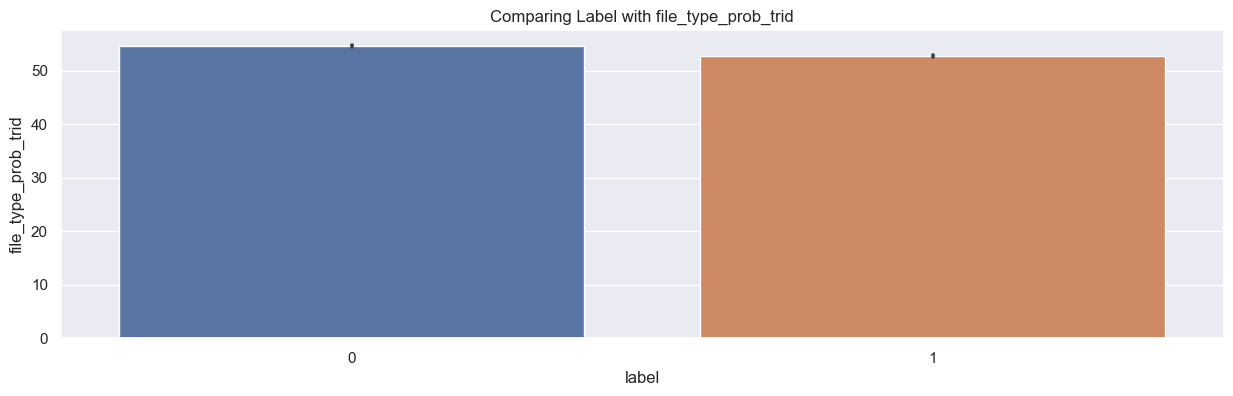

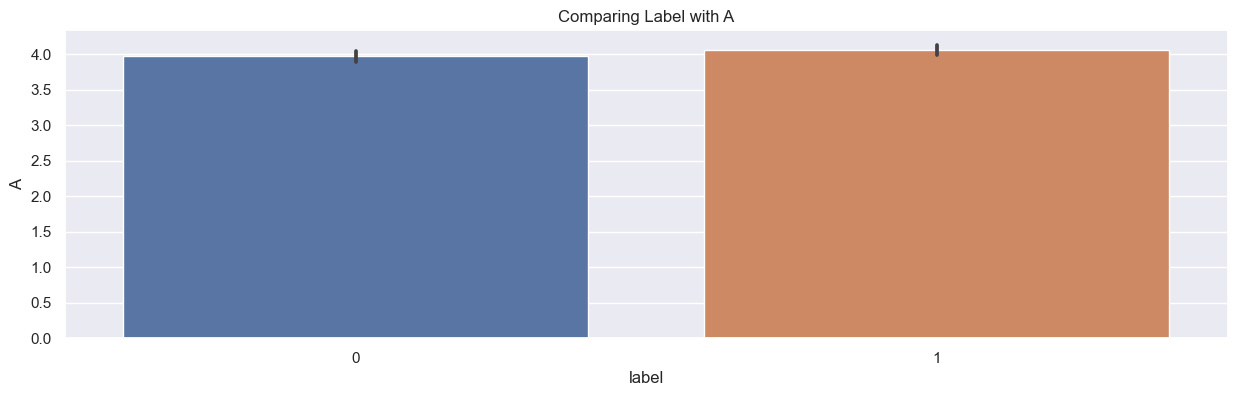

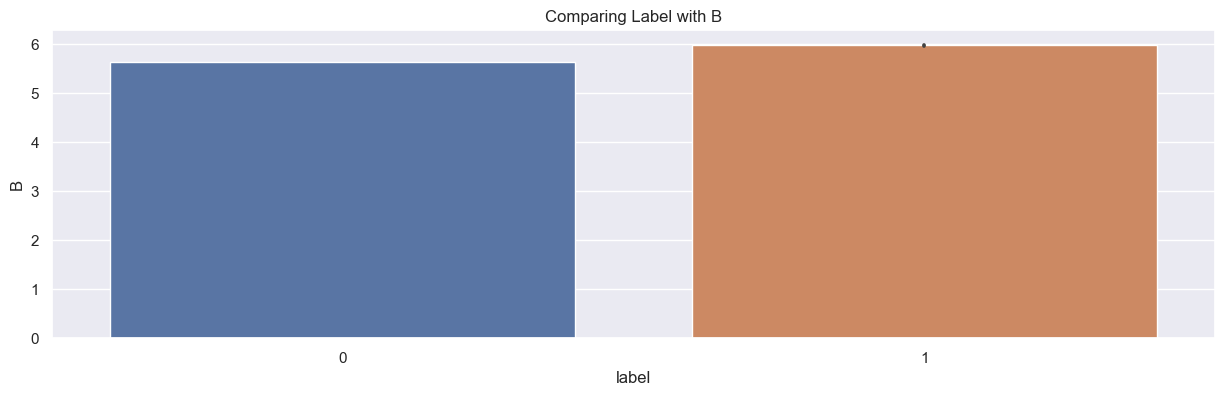

In [16]:
for i in numerical:
    fig , ax=plt.subplots(figsize=(15,4))
    sns.barplot(data = train_df, y=i, x= 'label')
    ax.set_ylabel(i)
    ax.set_xlabel("label")
    ax.set_title(('Comparing Label with {}').format(i))

The above plot compare the numerical variables with the target variable. this is done using the bar plot. From the above plot we can see that:
- for the zero value of label the size of the files are larger and for the one value of label the file size is small compare to zero
- the vsize for both value of label is almost equal, but slightly greater when the label is 1
- the total number of imports are greater when the label is 0
- when the total number of export is large it is more likely that the label will have 0 values and when the total number of exports are low this mean that there are more chances that the label will be 1
- when the total number of symbols is large it is more likely that the label will have 0 values and when the total number of symbols are low this mean that there are more chances that the label will be 1
- when the total number of numstring is large it is more likely that the label will have 0 values and when the total number of numstring are small this mean that there are more chances that the label will be 1
- when the total number of paths is large it is more likely that the label will have 0 values and when the total number of paths are low this mean that there are more chances that the label will be 1
- when the total number of urls is large it is more likely that the label will have 0 values and when the total number of urls are low this mean that there are more chances that the label will be 1
- when the values of registry is large it is more likely that the label will have 0 values and when the value of registry are low this mean that there are more chances that the label will be 1
- when the values of MZ is large it is more likely that the label will have 0 values and when the values of MZ are low this mean that there are more chances that the label will be 1
- when the value of printables is large it is more likely that the label will have 1 values and when the total number of printables are low this mean that there are more chances that the label will be 0
- when the values of avlength is large it is more likely that the label will have 1 values and when the total number of avlenght are low this mean that there are more chances that the label will be 0
- file_type_prob_trid have no clear impact on label
- The column A have no impact on label as the both of the bar are same 
- when the value of B is large it is more likely that the label will have 1 values and when the total number of B are low this mean that there are more chances that the label will be 0

**Correlation Plot**

Lets check the correlation values of each variable

<AxesSubplot:>

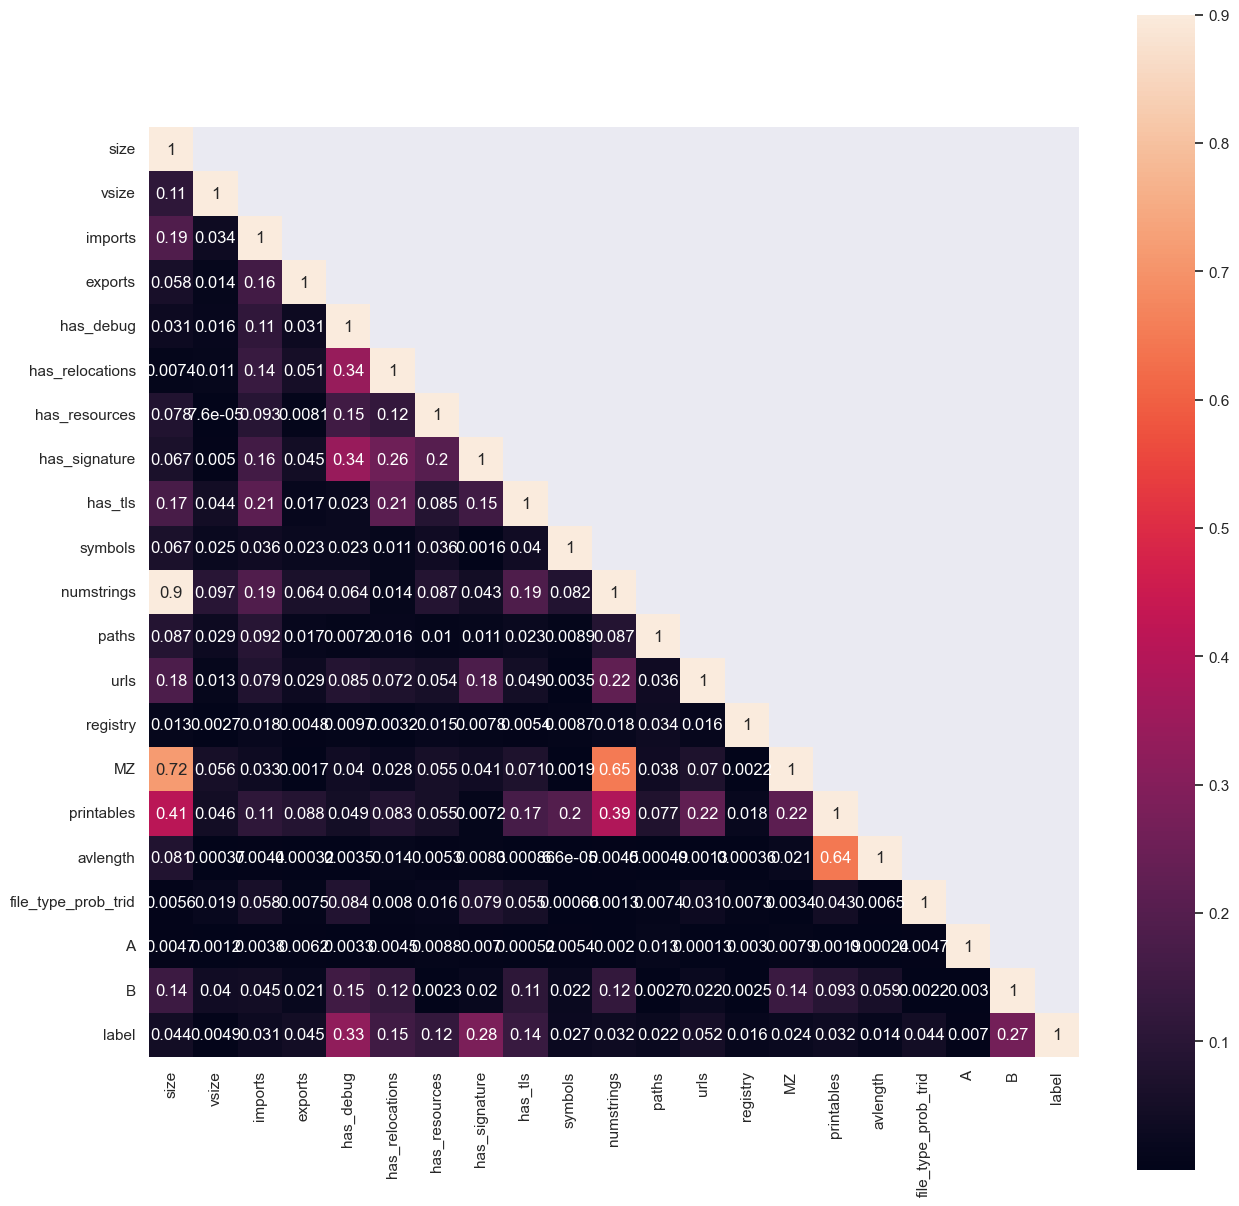

In [17]:
corr = train_df.corr(method = 'pearson').abs()

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

The above plot is the correlation plot, which represent the correlation between each and every variable. From the above plot we can observe that:
- size is highly correlated with numstrings, MZ, and moderately correlated with printables
- has debug is moderately correlated with has_relocation, has signature, label and B
- numstring is strongly correlated with MZ and printables
- avlength are strongly correlated ith printables 
- label is correlated with has_debug, has_relocation, has_resources, has_signature, and B

a this to note here is that only the variable whose values are numerical by their nature are included in this plot, this mean that the variables like C, file_type_trid are not included here. for this we need to convert the categorical into the numerical variables. 

## DATA PREPROCESSING

### Handling Missing Values

In [18]:
train_df.isnull().sum()

sha256                    0
size                      0
vsize                  1935
imports                1739
exports                2093
has_debug              2927
has_relocations        3324
has_resources          1961
has_signature          1937
has_tls                2898
symbols                2656
numstrings             2718
paths                  3660
urls                   2349
registry               2525
MZ                     3089
printables             2739
avlength               2757
file_type_trid            0
file_type_prob_trid       0
A                      3704
B                      3751
C                      2051
label                     0
dtype: int64

Here we can see that there are 19 columns which have missing values. as we closely observe these value we can see that these missing values are less then 6% of the dataset. so we will try to remove as removing them and see how the size of the dataset will be affected.

we will remove it by using the dropna command which will delete all of the rows which have missing values

In [19]:
train_df.dropna().shape

(25190, 24)

From the above command we can see that the removing all of the missing values will reduce the size of the dataset less then its half. so we will employ another technique for this. that is we will delete the missing values of all of those columns who have good/ acceptable correlation with the label column, and for all of the not correlated columns we will impute the missing value with median for numerical. The Reason for this approach is that, the imputing values are not the orignal values that were recorded, so it is a better approach to avoid it for the highly correlated features so that the model prediction will not be biased towards the self generated values. 

In [20]:
train_df.dropna(subset = ['sha256', 'size', 'exports', 'has_debug',
       'has_relocations', 'has_resources', 'has_signature', 'has_tls', 'urls',
          'file_type_trid', 'file_type_prob_trid',
       'B', 'C', 'label'],inplace=True)

In [21]:
train_df.shape

(40312, 24)

In [22]:
train_df.isnull().sum()

sha256                    0
size                      0
vsize                  1301
imports                1174
exports                   0
has_debug                 0
has_relocations           0
has_resources             0
has_signature             0
has_tls                   0
symbols                1790
numstrings             1789
paths                  2458
urls                      0
registry               1740
MZ                     2111
printables             1841
avlength               1830
file_type_trid            0
file_type_prob_trid       0
A                      2503
B                         0
C                         0
label                     0
dtype: int64

**Imputing values**

In [23]:
train_df.fillna(train_df.median(),inplace=True)

In [24]:
train_df.isnull().sum()

sha256                 0
size                   0
vsize                  0
imports                0
exports                0
has_debug              0
has_relocations        0
has_resources          0
has_signature          0
has_tls                0
symbols                0
numstrings             0
paths                  0
urls                   0
registry               0
MZ                     0
printables             0
avlength               0
file_type_trid         0
file_type_prob_trid    0
A                      0
B                      0
C                      0
label                  0
dtype: int64

In [25]:
train_df.shape

(40312, 24)

Now we dont have any missing values in our dataset, and the size of th dataset is now 40,312.

### Handling Outliers

Let's see the outliers of these numerical variables

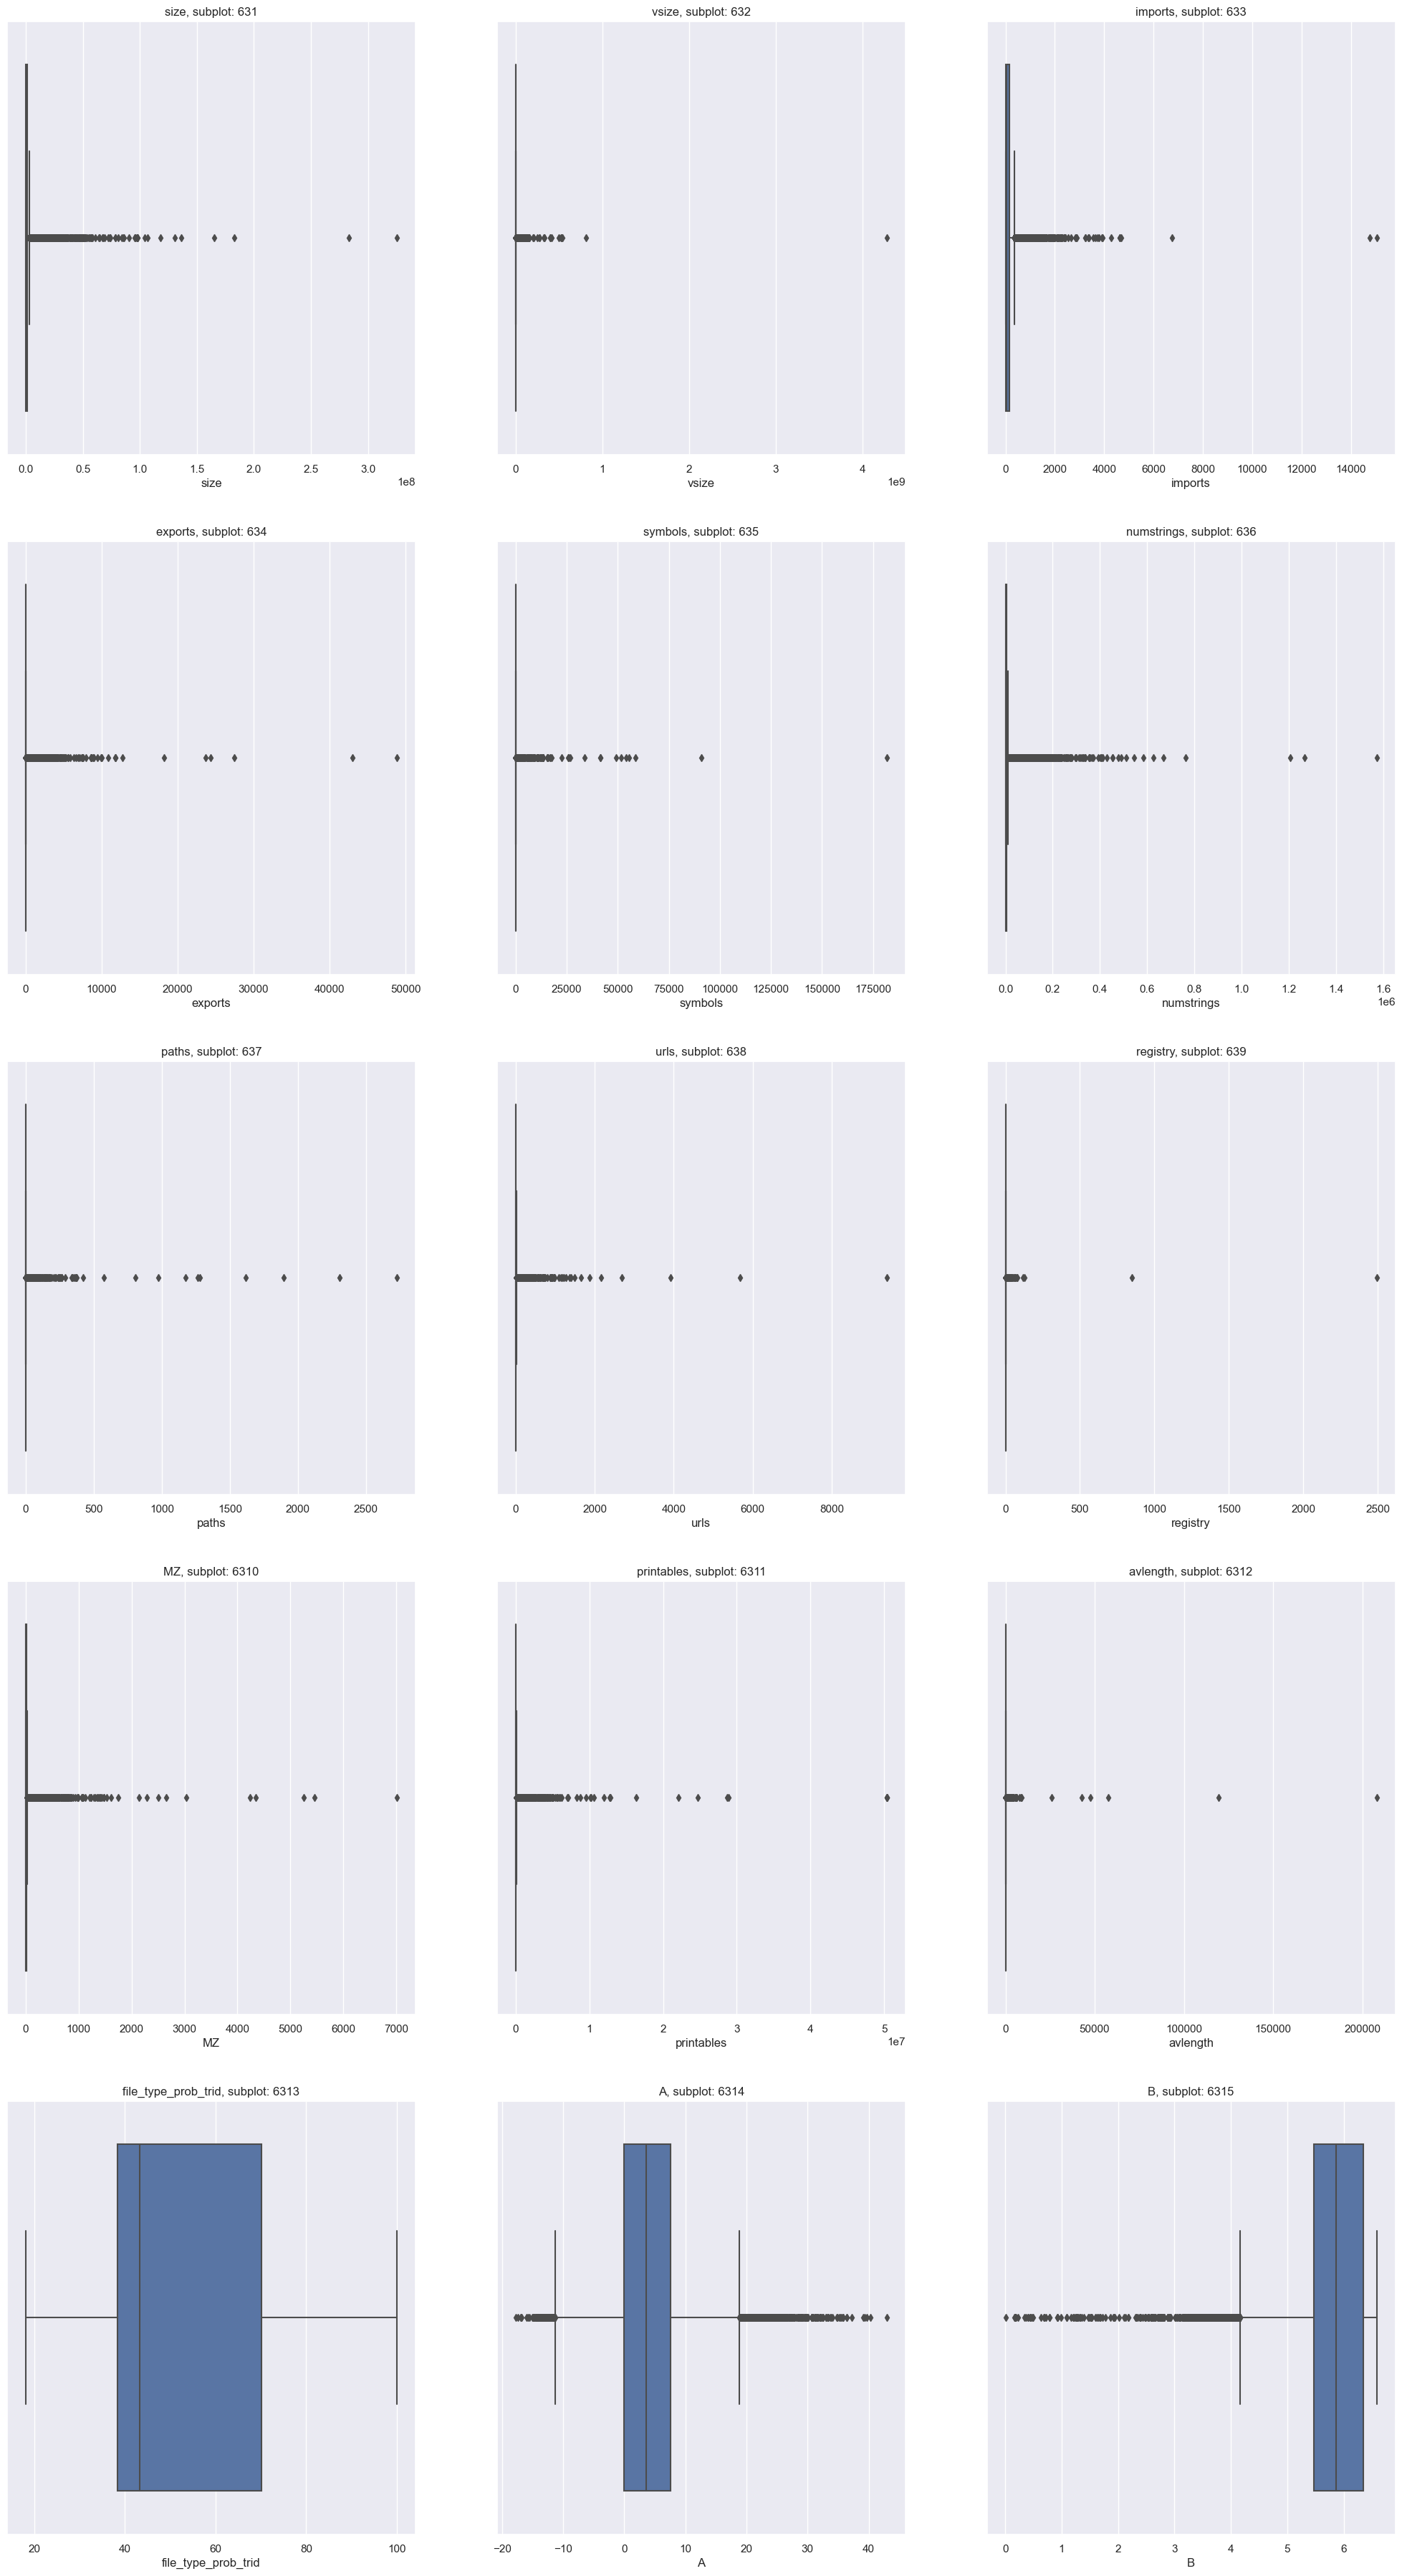

In [26]:
a=6
b=3
c=1
fig = plt.figure(figsize=(25,55))
for i in numerical:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(data= train_df, x=i)
    c = c + 1

The above plots represent the box plot for each of the numerical column. From the plot of columns, we can see that only the file_type_prob_trid column doesnot have outliers. and beside this column, all of the columns have outliers. But orginally outliers are those values that are logically incorrect. so logically all of these outlier that are shown here, are not actually impossible or ill-logical. so all of these value will not be considered as outliers. Beside this, the logical outlier is that the Vsize cannot be greater then the size of the file. so this condition is considered as an outlier, and we will remove it by using the following code.

In [27]:
train_df= train_df[train_df['size']<train_df['vsize']]

### Dealing with Categorical variables

Since ML models doesnot work with the non-numeric values, we will encode all of the categorical value with the numerical values using the label encoder

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label_encoder = LabelEncoder()
train_df['file_type_trid'] = label_encoder.fit_transform(train_df['file_type_trid'])
train_df['C'] = label_encoder.fit_transform(train_df['C'])

In [30]:
train_df.head()

,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,...,registry,MZ,printables,avlength,file_type_trid,file_type_prob_trid,A,B,C,label
0,a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd...,6744064,6799360.0,524.0,3.0,0.0,1.0,1.0,0.0,1.0,...,0.0,28.0,899075.0,13.857079,46,64.2,-3.978981,5.732354,2,1
1,ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf01...,22016,45056.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,856.0,9.617978,44,38.4,7.064133,5.738201,2,0
2,b0b126adc73b980a114e38027b082d149fcf491547452f...,686136,704512.0,133.0,4.0,1.0,1.0,1.0,1.0,0.0,...,0.0,2.0,32767.0,12.140422,68,82.0,1.052727,5.722733,3,0
3,ff6176c53ca9b58040c93870c264843b93b5e290c28e57...,8192,36864.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,678.0,9.549296,68,28.0,2.217531,5.896053,5,1
7,c3a12219d63fdf4a847b37459af59450a7722ceb2d4b93...,9778,40960.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,566.0,7.447368,10,100.0,1.280954,5.959035,0,1


### Random Sampling

Since the code need to be run within 1 hour, it is preferred to use a subset of data for training, for this we will sample out the 50% of training data 

In [31]:
sampled_df = train_df.sample(frac=0.5, random_state=42)

# Optional: Reset the index of the sampled DataFrame
sampled_df.reset_index(drop=True, inplace=True)

# Display the sampled DataFrame
sampled_df

,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,...,registry,MZ,printables,avlength,file_type_trid,file_type_prob_trid,A,B,C,label
0,f7337294b6bc1d20e3325d97f156b5066d12e4d45d7d22...,98729,167936.0,193.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2.0,6627.0,13.227545,57,41.0,-0.350628,5.733799,5,1
1,06494d0065e95223730f76e06b3fbe322c07b11312e5d3...,780288,802816.0,168.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,10.0,143562.0,37.969320,57,38.8,3.623736,5.472374,2,0
2,9912f19b7ebca73596a741a9d16d95d069554aab340b92...,101048,430080.0,94.0,4.0,1.0,1.0,1.0,1.0,0.0,...,0.0,2.0,29590.0,26.851180,25,41.1,2.160946,5.628395,5,0
3,00e0dddeda8080d6a05c291f0699881ce5c1d9ccb43d03...,662520,675840.0,156.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,7.0,64370.0,23.280289,57,41.0,5.112815,6.099252,2,0
4,6157335a1794f788fc92106fee61652fdf68a39773878b...,873984,901120.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,21.0,24634.0,5.894712,14,89.5,-3.796913,6.572044,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15940,0191145eebf5bc1549e4249a0e84ef67df3e62b5739442...,809558,3952640.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,4.0,89486.0,16.735740,7,44.2,-6.756348,5.770025,1,0
15941,70e6779556d48c09e78e136e3fb914914f6b41d2406f5f...,588800,901120.0,13.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,18235.0,6.294443,50,35.7,-2.409070,6.435781,4,1
15942,b06d8e3da1018e64967ded80a3560c75ab3c4de5e942e4...,140302,536576.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,13198.0,19.876506,57,67.3,13.374197,5.948093,3,1
15943,d37c5e7f653de65c1326133e7b81cab493502e7eb3bd0f...,1790976,1810432.0,189.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,19.0,31335.0,7.758108,68,32.2,-1.044709,6.410522,5,1


### Class Imbalance Problem

Here we can see that in the target variable the total number of 1 is not equal to the total number of 0. this could degrade the performance of classifer, as the classifier will be overwhelmed with the positive valued class. and classifier will not be good in classifying the negative class . so we will prevent this by replicating the negative class data. 

In [32]:
sampled_df['label'].value_counts()

1    8233
0    7712
Name: label, dtype: int64

In [33]:
aa =sampled_df[sampled_df['label']==0].head(521)

In [34]:
sampled_df = sampled_df.append(aa)

In [35]:
sampled_df['label'].value_counts()

1    8233
0    8233
Name: label, dtype: int64

Negative and positive classes are now equal

### Splitting X and Y data

In [36]:
y = sampled_df['label'].values
y=y.reshape(-1,1)

In [37]:
x = sampled_df[['size', 'vsize', 'imports', 'exports', 'has_debug',
       'has_relocations', 'has_resources', 'has_signature', 'has_tls',
       'symbols', 'numstrings', 'paths', 'urls', 'registry', 'MZ',
       'printables', 'avlength', 'file_type_trid', 'file_type_prob_trid', 'A',
       'B', 'C']]

### Data Normalization

this data is not normalized, as the ranges of all of the numerical columns are different. However the need of normalization depend on the type of model used. as the KNN and SVM uses the distance measure, so they need data to be normalized. In Logistic regression, normalization helps the model conerge faster during the optimization process. whereas the Decision tree, random forest and Naive bayes doesnot need data to be normalized. 

So as the half of the model need data to be normalized we will normalize our data. so for this we will create a pipeline for normalization with the PCA for dimension reduction.

### Dimensionality Reduction

The dimensionality of problem refers to the situation where there are too many number of features/ variable present in the dataset. in other words the dimension is too high, this can lead to several problems like, increased computional complexity, make the model difficult to capture important patterns, Overfitting, increases the risk of multicollinearity. usually the dimensions more then 20 are considered as the high dimensional space. but more accuractely, to identify the best number of dimension PCA model uses the variance ratio, If a significant amount of variance can be explained with a relatively small number of principal components, it suggests that the original dimensions may be too great.

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalization
    ('pca', PCA()), 
    # PCA for dimensionality reduction
])

# Define the parameter grid for grid search
param_grid = {
    'pca__n_components': [3, 5, 10, 12,15,18,20, 22, 25],  # List of different n_components values to try
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(x, y)  
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'pca__n_components': 22}


To find the best value for the n-component for the PCA, Here we have used the grid search, which iterate through all of the provied values and found the best value for PCA n_component. The grid search suggest the to use 22 n_component that is the original size of the dataset.

### Creating Pipeline for Preprocessing the data

this will include the normalization and dimension reduction

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalization
    ('pca', PCA(n_components=22)),  # PCA for dimensionality reduction
])

scaled_x = pipeline.fit_transform(x)

by reducing the dimension, it is less likely that our models over fit the data. and it enable the model to accuractely capture the the most releven patterns from the most important features.  PCA logically 

### Train-Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
xtrain , xtest , ytrain, ytest =train_test_split(scaled_x,y,test_size=0.2,random_state=42 )

In [42]:
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (13172, 22)
xtest shape  :  (3294, 22)
ytrain shape :  (13172, 1)
ytest shape  :  (3294, 1)


### Applying Preprocessing pipeline on the test dataset

In [43]:
# df.columns

In [44]:
test_df = pd.read_csv('test.csv')

In [45]:
test_df.head()

,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,...,urls,registry,MZ,printables,avlength,file_type_trid,file_type_prob_trid,A,B,C
0,023928c14abe04196d45bb4578b8fa0eb02189898ce93b...,964814,2072576.0,2.0,NaN,0.0,0.0,NaN,0.0,0.0,...,0.0,0.0,14.0,22934.0,5.703556,Win32 Executable (generic),42.7,-1.414118,6.554459,er
1,6436083d4eed84436768d66829b961927eeb9de2e6657f...,116736,200704.0,136.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,5.0,7445.0,20.397260,Win32 Executable MS Visual C++ (generic),48.8,NaN,5.581053,cs
2,038e71f41fdc5edb3a7afc112fb0679a4a5d6d94512055...,3091456,118784.0,124.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,9.0,148608.0,11.072796,InstallShield setup,24.1,-1.713507,6.103680,vh
3,be913ef29b4566e7817a5ab2c4a4289a455e9b562e1da0...,1249792,1257472.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,NaN,0.0,2.0,121156.0,18.679618,Win32 Executable (generic),33.1,9.215390,5.418556,vh
4,e78f83f0af4f1fbcf8fffd562b4734701483818078bf0e...,2117632,2142208.0,165.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,21562.0,7.528631,Win32 Executable Microsoft Visual Basic 6,84.4,2.224768,NaN,er


In [46]:
test_df.shape

(18000, 23)

this test dataset contain 18,000 rows and 23 columns. 

Deteling the sha256 column as this column is an id.

In [47]:
del test_df['sha256']

Checking Missing values

In [48]:
test_df.isnull().sum()

size                      0
vsize                   572
imports                1274
exports                2814
has_debug              1614
has_relocations         995
has_resources           628
has_signature           555
has_tls                 886
symbols                 822
numstrings              825
paths                  1150
urls                    755
registry                745
MZ                      886
printables              842
avlength                793
file_type_trid            0
file_type_prob_trid       0
A                      1173
B                      1138
C                       593
dtype: int64

**Feature Encoding**

In [49]:
test_df['file_type_trid'] = label_encoder.fit_transform(test_df['file_type_trid'])
test_df['C'] = label_encoder.fit_transform(test_df['C'])

In [50]:
test_df.head()

,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,...,urls,registry,MZ,printables,avlength,file_type_trid,file_type_prob_trid,A,B,C
0,964814,2072576.0,2.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,14.0,22934.0,5.703556,46,42.7,-1.414118,6.554459,2
1,116736,200704.0,136.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5.0,7445.0,20.397260,52,48.8,NaN,5.581053,1
2,3091456,118784.0,124.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,9.0,148608.0,11.072796,18,24.1,-1.713507,6.103680,5
3,1249792,1257472.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,0.0,2.0,121156.0,18.679618,46,33.1,9.215390,5.418556,5
4,2117632,2142208.0,165.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,21562.0,7.528631,57,84.4,2.224768,NaN,2


**Appling preprocessing pipeline**

In [51]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer


# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputer to handle missing values
    ('scaler', StandardScaler()),  # StandardScaler for feature scaling
    ('pca', PCA(n_components=22))  # PCA for dimensionality reduction
])

# Fit and transform the data using the pipeline
scale_test_df = pipeline.fit_transform(test_df)

## Classification Model Implementation and Evaluation

Here we will implement different classification algorithms over data, evaluate them, plot their results and compare them to find the best performing Model. Here we will implement the following algorithms:
- k-Nearesr Neighors (KNN)
- Decision Tree classifier
- Support Vector Machine Classifier
- Navie bayes classfier
- Random Forest classfier
- Logistic Regression Multi-layer perceptron (ANN)

Each model will be evaluated using the classification report, confusion matix and ROC curve

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn import metrics


In [53]:
def classification_report(model):
    prediction_test = model.predict(xtest)
    # Print the prediction accuracy
    accuracy = metrics.accuracy_score(ytest, prediction_test)
    confusion_matrix = metrics.confusion_matrix(ytest, prediction_test)
    classification = metrics.classification_report(ytest, prediction_test)

    print('============================== Model Evaluation ==============================')
    print('Classifier :',model)
    print("\n Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 


In [54]:
class_names=[1,0]
def plot_conf_matrix(ytest, prediction_test, class_names):
    cnf_matrix = metrics.confusion_matrix(ytest, prediction_test)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [55]:
def plot_roc(model,xtest,ytest):
    y_pred_proba = model.predict_proba(xtest)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(ytest, y_pred_proba)
    print("AUC: ",auc(fpr, tpr))
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label='NB')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()


### 1-  K- Nearest Neighors (KNN)

**Hyper parameters**

The main hyperparameters of KNN are:
- n_neighbors: The number of neighbors to take into account while making predictions. It establishes the number of data points from the training set that will be utilized to categorize or forecast the target value for a fresh set of data. More neighbors are taken into account when the number of n_neighbors is higher, which might result in smoother decision boundaries but also more noise. On the other side, a lower number of n_neighbors can result in decisions that are more localized but may be more susceptible to noise and outliers.
- weights: The weights option controls how much of a prediction's weight is given to each neighbor. It can be set to "distance" or "uniform." While the "distance" option assigns weights proportional to the inverse of the distance, the "uniform" option gives each neighbor the same weight. 
- Metric: It describes the distance metric that is used to compare instances. Euclidean distance, Manhattan distance, and Minkowski distance are examples of common distance measures. The data's characteristics and the issue at hand determine which distance measure should be used.
- algorithm: It chooses the algorithm that is used to calculate nearest neighbors. There are various possibilities:

    - By calculating the distances between each pair of occurrences, a brute-force search is carried out to identify the closest neighbors.
    - To expedite the look for nearest neighbors in lower-dimensional space, the kd_tree function constructs a KD-tree data structure.
    - To minimize the amount of distance calculations necessary, ball_tree builds a ball tree data structure.
- leaf_size: When utilizing the kd_tree or ball_tree algorithms, the leaf_size parameter determines how many points the algorithm will reach before resorting to brute-force search. While longer query time may be the outcome of larger leaf_size, tree creation may be faster.

These are a few of the most important KNN hyperparameters that can be adjusted to enhance the algorithm's performance.

To find the best values of these hyper parameters grid search is applied. Grid search is used with cross validation technique to find the best set of hyper-parameter values.

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['brute', 'kd_tree']
}

In [57]:
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
gs_knn = GridSearchCV(knn, param_grid, cv=5)
gs_knn.fit(xtrain, ytrain) 
print("Best Hyperparameters:", gs_knn.best_params_)

Best Hyperparameters: {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [58]:
clf_knn = gs_knn.best_estimator_
clf_knn

KNeighborsClassifier(algorithm='brute', metric='manhattan', weights='distance')

In [59]:
prediction_test = clf_knn.predict(xtest)

In [60]:
classification_report(clf_knn)

============================== Model Evaluation ==============================
Classifier : KNeighborsClassifier(algorithm='brute', metric='manhattan', weights='distance')

 Model Accuracy:
 0.8594414086217365

Confusion matrix:
 [[1376  253]
 [ 210 1455]]

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      1629
           1       0.85      0.87      0.86      1665

    accuracy                           0.86      3294
   macro avg       0.86      0.86      0.86      3294
weighted avg       0.86      0.86      0.86      3294



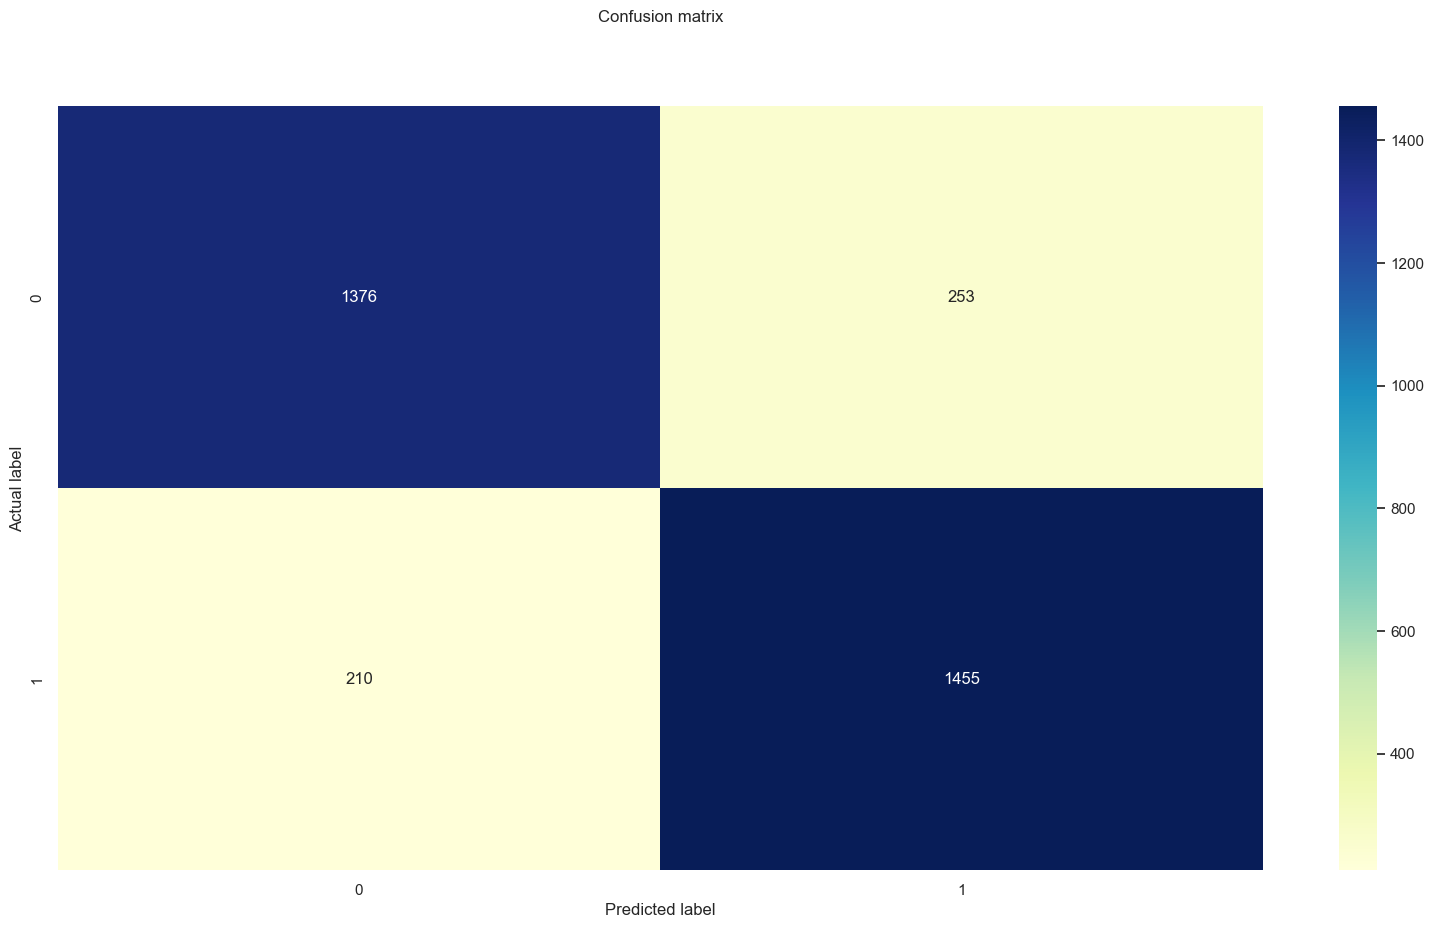

In [61]:
plot_conf_matrix(ytest, prediction_test, class_names)

AUC:  0.927830224331145


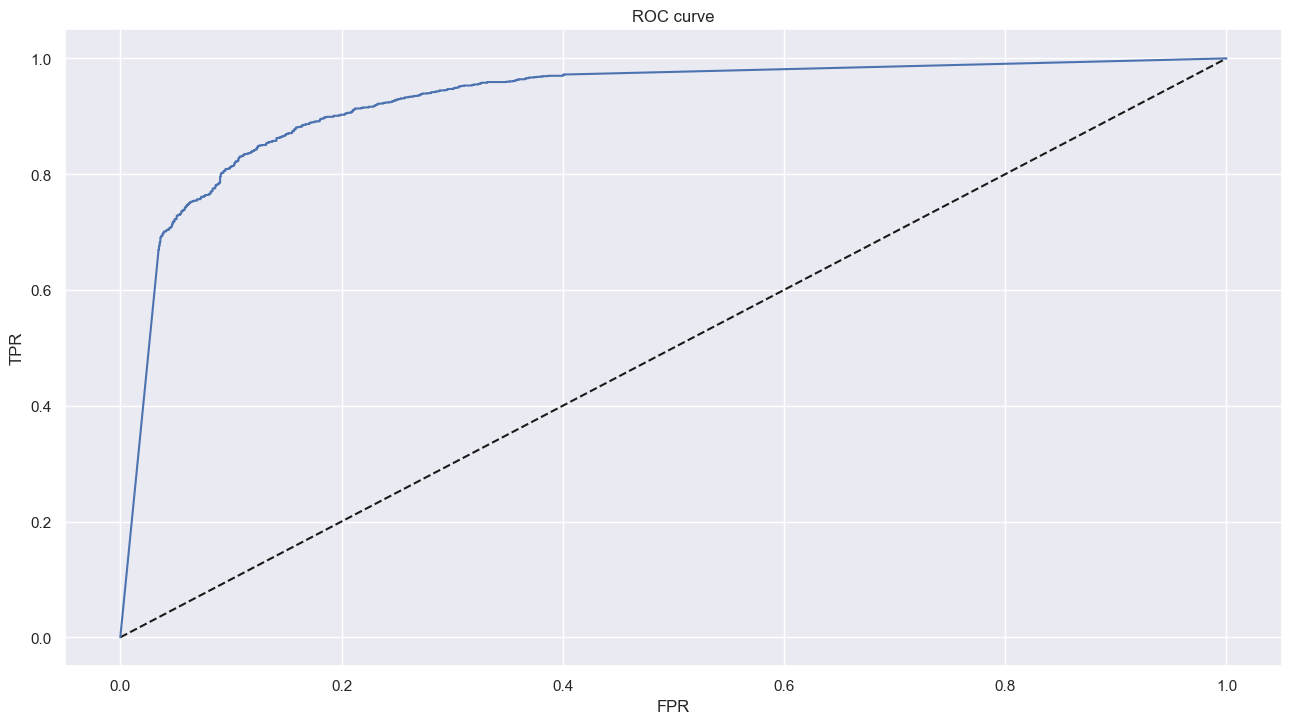

In [62]:
plot_roc(clf_knn,xtest,ytest)

The best hyperparameters of KNN model are 'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'. From the classification report we can see that the model accuracy is 86% with 86% precision. and From the confusion matrix we can see that the model correctly classified 2,831 files and only miss classified 463 files. The ROC curves indicate that the a good AUC value that 93%

### 2- DecisionTree Classifier

**HyperParameter**

The key hyperparameters of the decision tree classifier:
- Criteria: It details the method for calculating a split is quality. The two popular choices are:

    - gini: It makes use of the Gini impurity criteria, which calculates the likelihood that a randomly selected element would be incorrectly classified if its labels were distributed randomly throughout the node.
    - Entropy is used, which evaluates the disorder or unpredictability of the labels in the node and is the basis for the information gain criterion.

- max_depth: It regulates the decision tree's maximum depth. Although a deeper tree may be able to capture more intricate relationships in the data, it may also overfit. Overfitting can be avoided by setting max_depth to a lower amount.

- It provides the bare minimum of samples needed to separate an internal node (min_samples_split). A node will not be further split if the quantity of samples there is below this limit. By guaranteeing that a minimal number of samples are present at each split, overfitting can be avoided by increasing the value of min_samples_split.

- The minimal number of samples necessary to be at a leaf node is specified by the variable min_samples_leaf. Even though it does not increase the overall quality of the split, more splits may be produced if the number of samples at a leaf node is below this cutoff. Overfitting can be avoided, and the size of the tree can be managed, by increasing the value of min_samples_leaf.

- max_features: It establishes the most features that should be taken into account while determining the appropriate split. The choices consist of:

    - sqrt: The square root of the total number of characteristics is taken into account.
    - log2: It takes the entire number of features' logarithm in base 2 into account.
    - None: It takes into account every feature.
- class_weight: To address concerns with class imbalance, weights are assigned to the classes. You can adjust it to:

     - None: Every class receives the same treatment.
     - balanced: Modifies the weights in an inverse relationship to the input data's class frequencies.

To find the best values of these hyper parameters grid search is applied. Grid search is used with cross validation technique to find the best set of hyper-parameter values.

In [63]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [64]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

In [65]:
dt_classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(xtrain,ytrain) 

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [66]:
clf_dt = grid_search.best_estimator_
clf_dt

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='sqrt', min_samples_split=5)

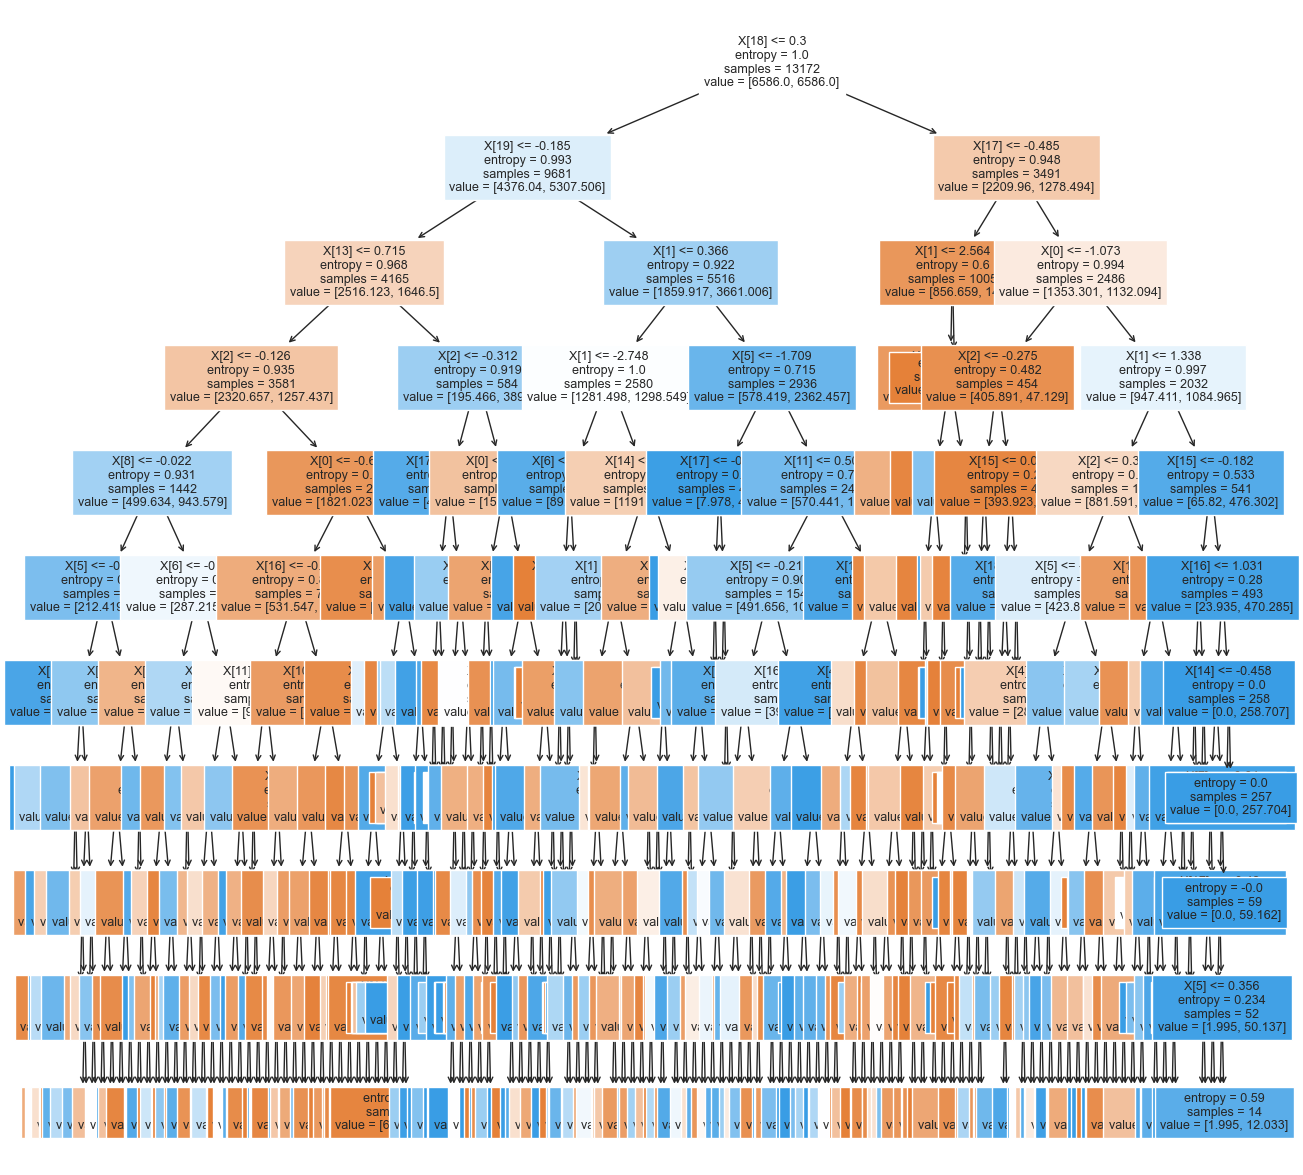

In [67]:
plt.figure(figsize=(15,15))
plot_tree(clf_dt,fontsize=9,filled=True)
plt.show()

In [68]:
pred_test_dt=clf_dt.predict(xtest)

In [69]:
classification_report(clf_dt)

============================== Model Evaluation ==============================
Classifier : DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='sqrt', min_samples_split=5)

 Model Accuracy:
 0.8239222829386764

Confusion matrix:
 [[1355  274]
 [ 306 1359]]

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1629
           1       0.83      0.82      0.82      1665

    accuracy                           0.82      3294
   macro avg       0.82      0.82      0.82      3294
weighted avg       0.82      0.82      0.82      3294



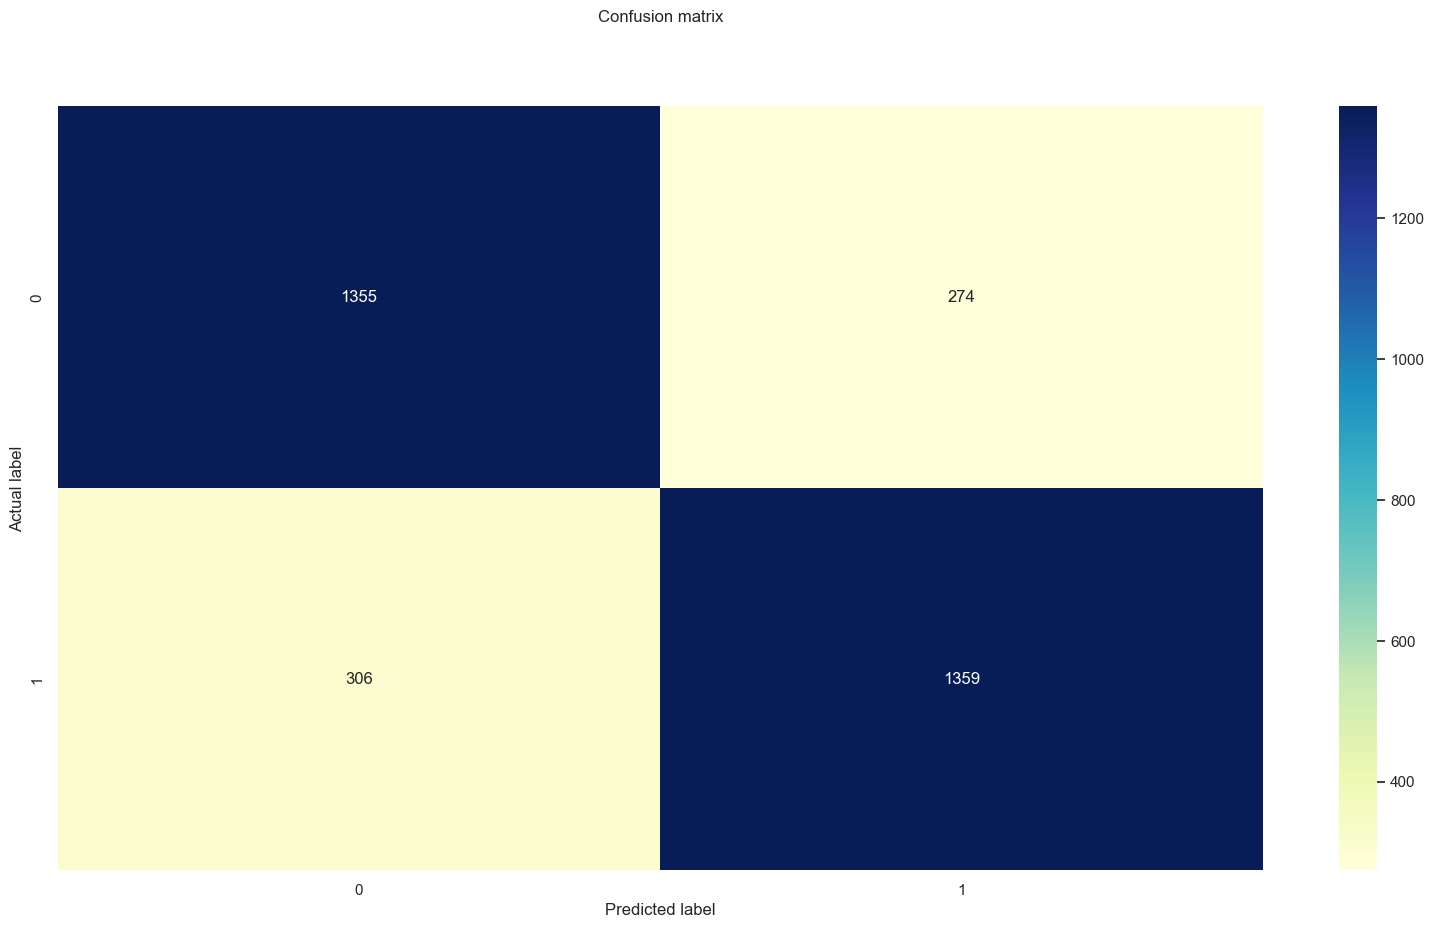

In [70]:
plot_conf_matrix(ytest, pred_test_dt, class_names)

AUC:  0.8916397060043468


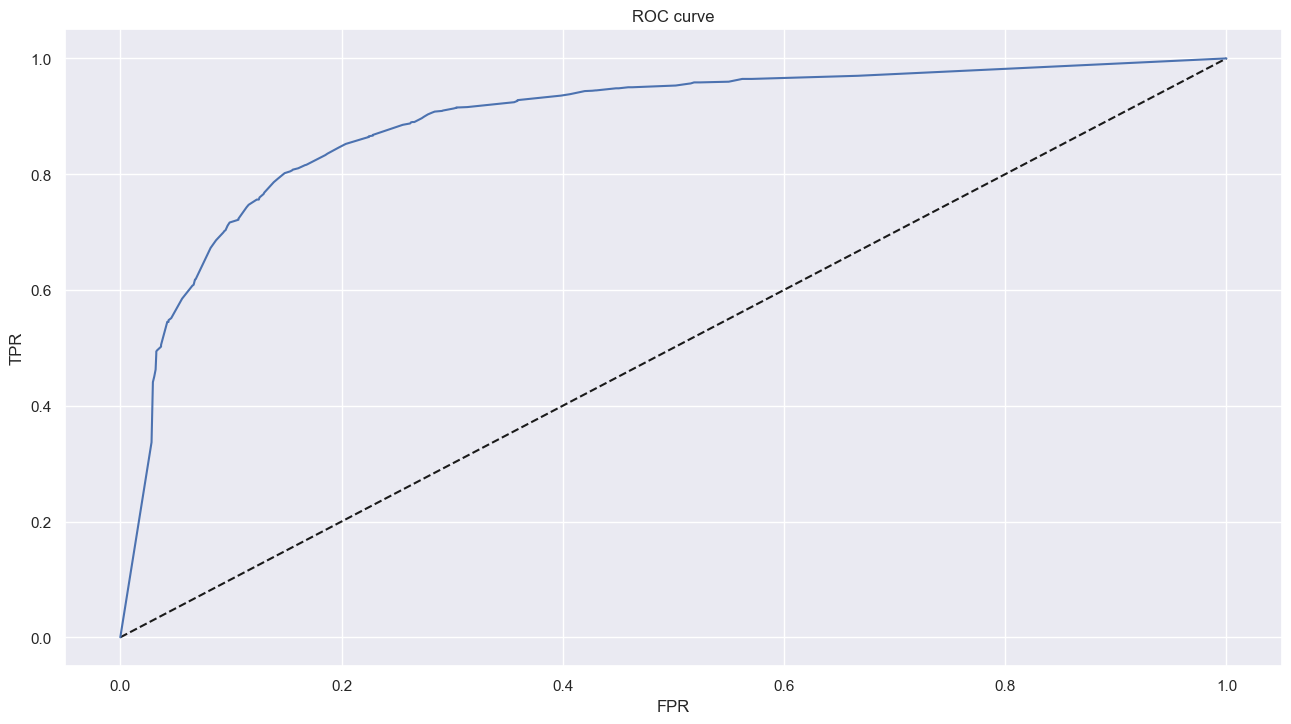

In [71]:
plot_roc(clf_dt,xtest,ytest)

The best hyperparameters of decision tree model are 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5. From the classification report we can see that the model accuracy is 82.3% with 82% precision of 0 class and 83% precision of 1 class. and From the confusion matrix we can see that the model correctly classified 2,714 files and only miss classified 580 files. The ROC curves indicate that the a good AUC value that 89%

### 3- Support Vector Machine

**HyperParameter**
the key hyperparameters of the SVM classifier:
- C: The trade-off between maximizing the margin and decreasing the classification error is controlled by the regularization parameter. Larger margins are possible with a lower value of C, but some points may be misclassified. On the other hand, a higher value of C reduces the margin in order to achieve a more accurate categorization.

- kernel: SVM classifiers turn the input data into a higher-dimensional feature space using a kernel function, which makes it simpler to locate a separating hyperplane. There are numerous kernel functions that can be employed, such as:
    - The linear kernel is appropriate for data that can be separated linearly and computes the dot product between the input characteristics.
    - RBF kernel: It employs a Gaussian-like kernel that takes into account how similar the points are to one another in the feature space.
    - Sigmoid kernel: It calculates the similarity between points using a hyperbolic tangent function.
- Gamma: The RBF, polynomial, and sigmoid kernels only use this particular parameter. Low numbers indicate a remote impact, whereas high values indicate a closer influence. It calculates the influence of a single training example. While a large gamma can result in a more intricate and tightly fitting decision border, a modest gamma produces a smooth decision boundary.
- degree: The polynomial kernel-specific parameter. It specifies the polynomial function's degree that was employed to change the input properties. More complex decision boundaries are possible with higher degrees, although overfitting is also a possibility.
- class_weight: To overcome concerns with class imbalance, it gives the classes weights. You can adjust it to:
    - None: Every class receives the same treatment.
    - balanced: Modifies the weights in an inverse relationship to the input data's class frequencies.
    
To find the best values of these hyper parameters grid search is applied. Grid search is used with cross validation technique to find the best set of hyper-parameter values.

In [72]:
from sklearn.svm import SVC

param_grid = {
    'kernel': ['linear'],
#     'gamma': [0.1, 1],
#     'class_weight': ['balanced'],
    'probability':[True]
}

In [73]:
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'kernel': 'linear', 'probability': True}


In [74]:
clf_svm = grid_search.best_estimator_
clf_svm

SVC(kernel='linear', probability=True)

In [75]:
#Predict the response for test dataset
y_pred_svm = clf_svm.predict(xtest)

In [76]:
classification_report(clf_svm)

============================== Model Evaluation ==============================
Classifier : SVC(kernel='linear', probability=True)

 Model Accuracy:
 0.7595628415300546

Confusion matrix:
 [[1246  383]
 [ 409 1256]]

Classification report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.76      1629
           1       0.77      0.75      0.76      1665

    accuracy                           0.76      3294
   macro avg       0.76      0.76      0.76      3294
weighted avg       0.76      0.76      0.76      3294



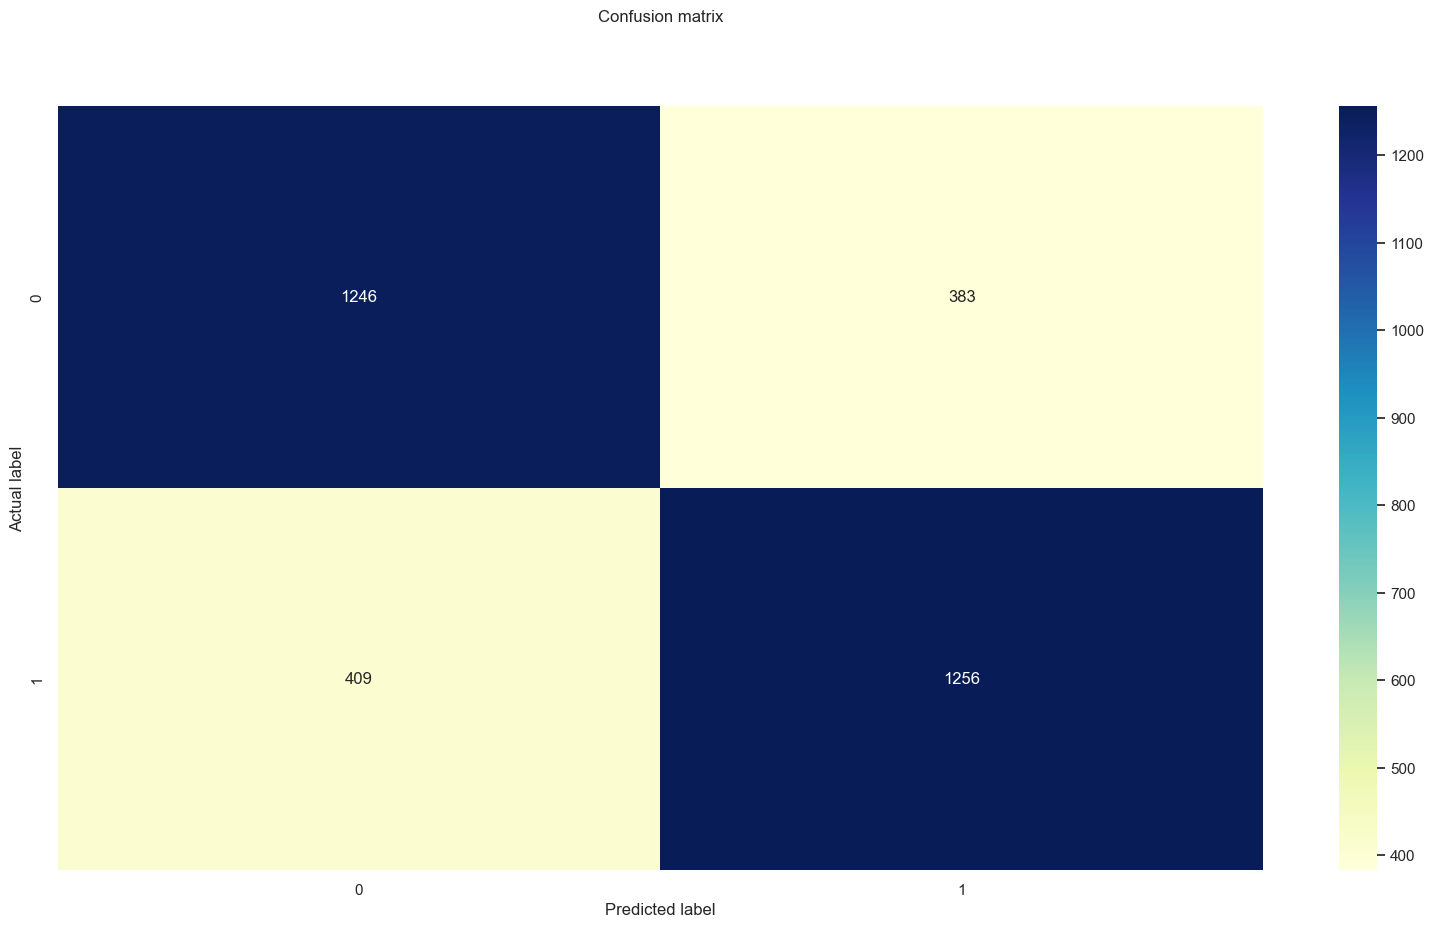

In [77]:
plot_conf_matrix(ytest, y_pred_svm, class_names)

AUC:  0.8278488433184567


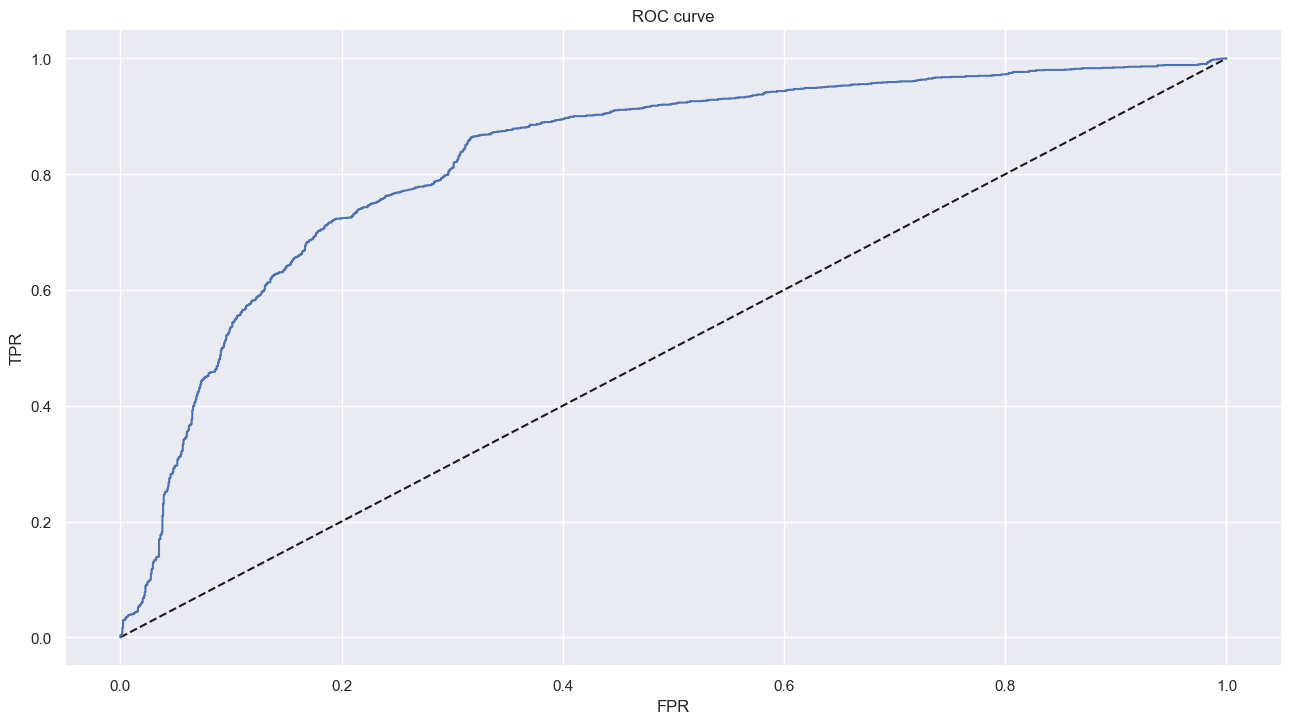

In [78]:
plot_roc(clf_svm,xtest,ytest)

The best hyperparameters of SVM model are 'kernel': 'linear', 'probability': True. From the classification report we can see that the model accuracy is 75% with 75% precision of 0 class and 77% precision of 1 class. and From the confusion matrix we can see that the model correctly classified 2502 files and only miss classified 789 files. The ROC curves indicate that the a good AUC value that 83%. this indicate that is model doesnot perform well on this dataset. this model slightly over fit the data that belongs to the label 1. this is because there is a difference between the precision of 0 and 1 label.

### 4- Naive Bayes

**Hyperparameter**
the key hyperparameters of the Gaussian Naive Bayes classifier:
- Priors: It depicts the classes' prior probabilities. Since the priors are by default set to None, the training data will be used to infer the priors. To override the inferred values, manually set the prior probability for each class.

The Gaussian Naive Bayes classifier uses these as its primary hyperparameters. In comparison to other classifiers like SVM or decision trees, Gaussian Naive Bayes requires significantly less tuning of its hyperparameters. The classifier makes the assumption that each feature is independent and has a Gaussian distribution, therefore it does not need to optimize its parameters in a complicated way.

Naive Bayes classifiers are generally not extremely sensitive to the precise values of hyperparameters, it should be noted. In actual use, they frequently function effectively with the default settings. If you are already familiar with the class distribution, you can experiment with different previous values.

since there will not be a strong impact of hyperparameter changes, we will not use the grid search. and simply apply the model directly to the dataset.

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
clf_nb= GaussianNB().fit(xtrain, ytrain) 
pred_test_nb = clf_nb.predict(xtest)

In [81]:
classification_report(clf_nb)

============================== Model Evaluation ==============================
Classifier : GaussianNB()

 Model Accuracy:
 0.5388585306618093

Confusion matrix:
 [[ 261 1368]
 [ 151 1514]]

Classification report:
               precision    recall  f1-score   support

           0       0.63      0.16      0.26      1629
           1       0.53      0.91      0.67      1665

    accuracy                           0.54      3294
   macro avg       0.58      0.53      0.46      3294
weighted avg       0.58      0.54      0.46      3294



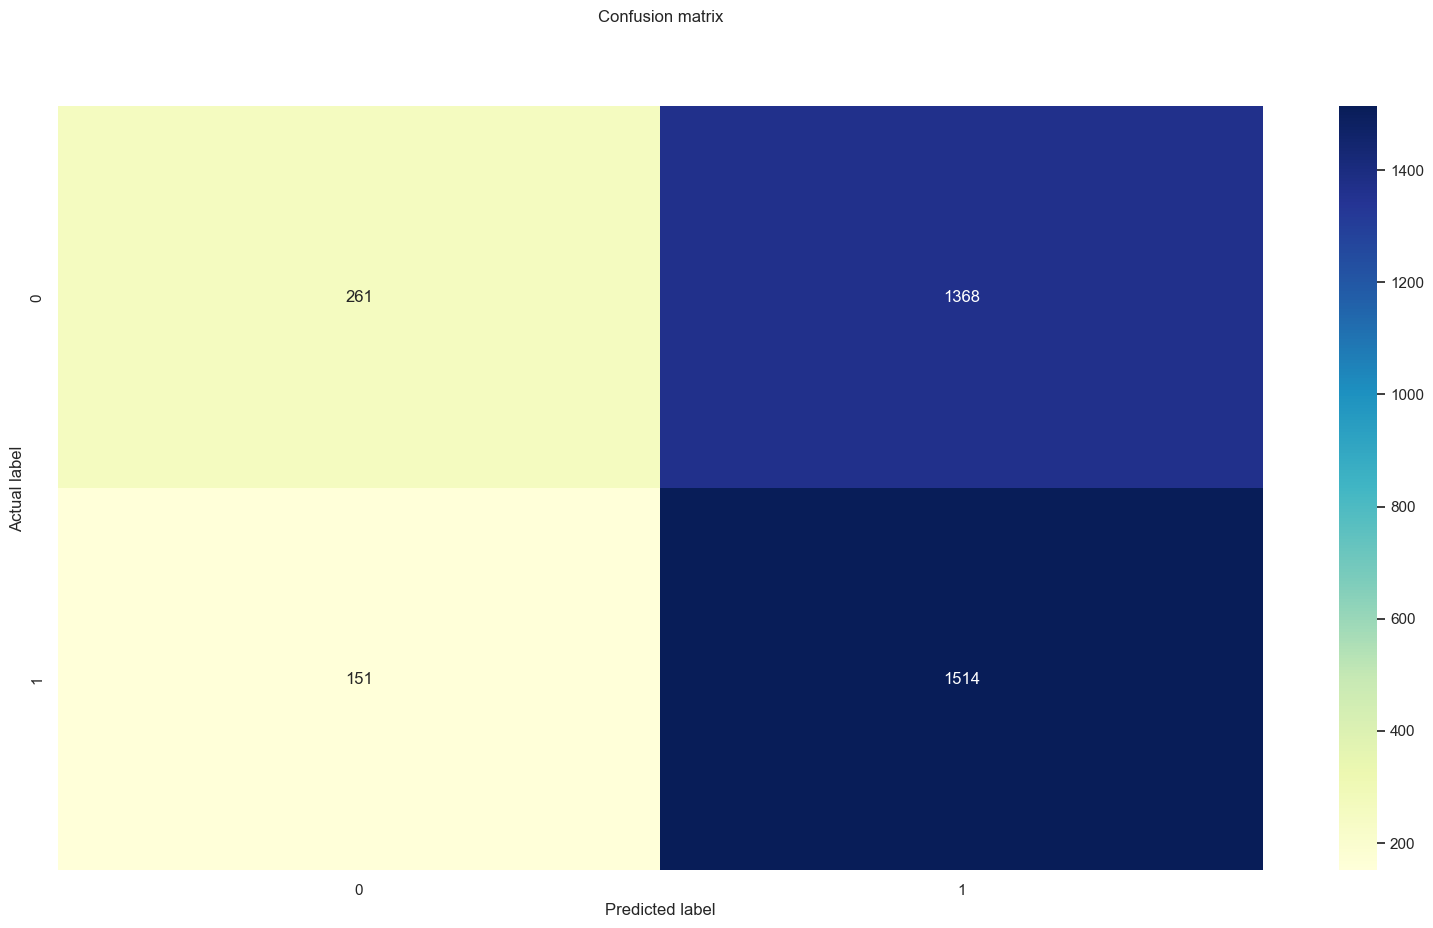

In [82]:
plot_conf_matrix(ytest, pred_test_nb, class_names)

AUC:  0.7399797587642892


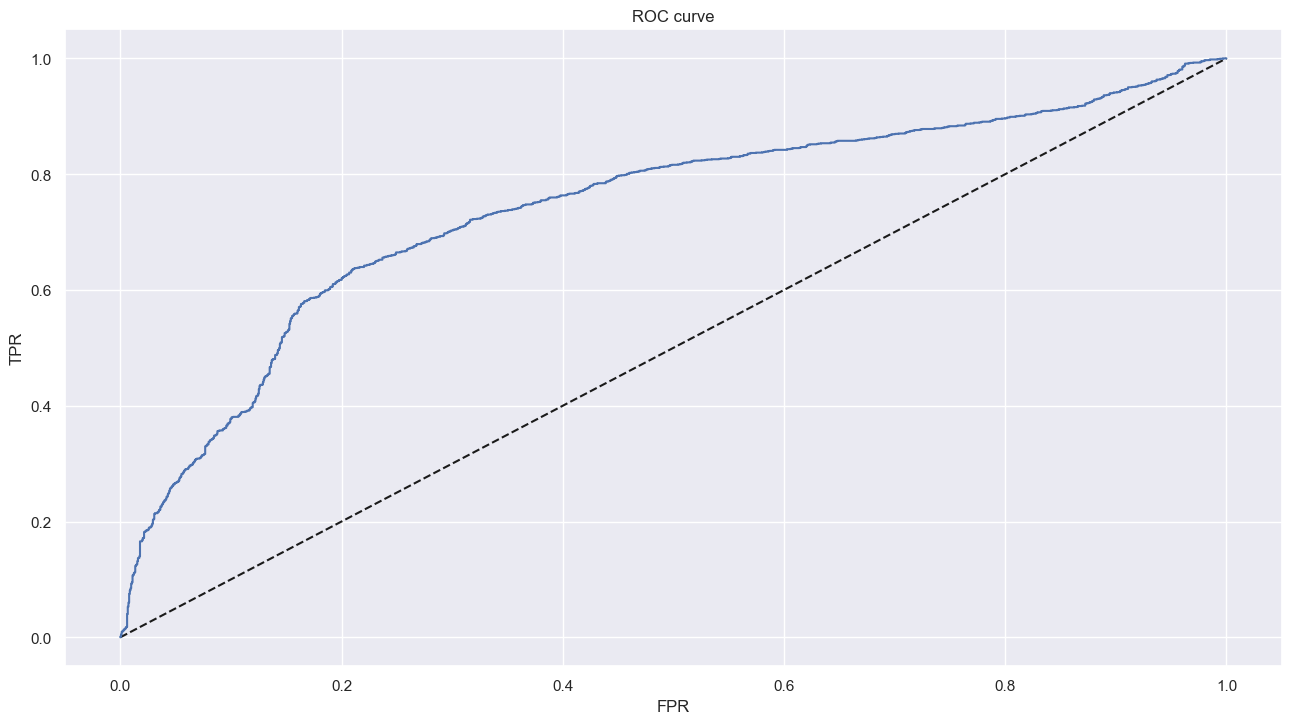

In [83]:
plot_roc(clf_nb,xtest,ytest)

From the classification report we can see that the model accuracy is 54% with 63% precision of 0 class and 53% precision of 1 class. and From the confusion matrix we can see that the model correctly classified 1775 files and miss classified 1519 files. The ROC curves indicate that the a good AUC value that 74%. the accuracy of the model indicate that the model doesnot perform well on for the 1 label. and overfit the data that belongs to the label 0

### 5- Random Forest

**Hyperparameter**

the key hyperparameters of the Random Forest classifier:
- n_estimators: The number of decision trees in the random forest is represented by the variable n_estimators. The performance of the model is typically enhanced by adding more estimators, but the computational complexity also rises. Finding the right balance between precision and computational effectiveness is crucial.
- Criteria: It details the method for calculating a split is quality. The two popular choices are:
    - gini: It makes use of the Gini impurity criteria, which calculates the likelihood that a randomly selected element would be incorrectly classified if its labels were distributed randomly throughout the node.
    - Entropy is used, which evaluates the disorder or unpredictability of the labels in the node and is the basis for the information gain criterion.
- max_depth: It regulates the decision tree's maximum depth. Although a deeper tree may be able to capture more intricate relationships in the data, it may also overfit. Overfitting can be avoided by setting max_depth to a lower amount.

- It provides the bare minimum of samples needed to separate an internal node (min_samples_split). A node will not be further split if the quantity of samples there is below this limit. By guaranteeing that a minimal number of samples are present at each split, overfitting can be avoided by increasing the value of min_samples_split.

- The minimal number of samples necessary to be at a leaf node is specified by the variable min_samples_leaf. Even though it does not increase the overall quality of the split, more splits may be produced if the number of samples at a leaf node is below this cutoff. Overfitting can be avoided, and the size of the tree can be managed, by increasing the value of min_samples_leaf.

- max_features: It establishes the most features that should be taken into account while determining the appropriate split. The choices consist of:
    - sqrt: The square root of the total number of characteristics is taken into account.
    - log2: It takes the entire number of features' logarithm in base 2 into account.
    - None: It takes into account every feature.
- class_weight: To address concerns with class imbalance, weights are assigned to the classes. You can adjust it to:
    - None: Every class receives the same treatment.
    - balanced: Modifies the weights in an inverse relationship to the input data's class frequencies.
    
To find the best values of these hyper parameters grid search is applied. Grid search is used with cross validation technique to find the best set of hyper-parameter values.

In [84]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [ 'sqrt'],
    'class_weight': ['balanced']
}

rf_classifier = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(xtrain,ytrain) 

print("Best Hyperparameters:", grid_search.best_params_)

clf_rf = grid_search.best_estimator_
clf_rf

Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestClassifier(class_weight='balanced', max_depth=7,
                       max_features='sqrt', n_estimators=200)

In [85]:
pred_test_rf=clf_rf.predict(xtest)

In [86]:
classification_report(clf_rf)

============================== Model Evaluation ==============================
Classifier : RandomForestClassifier(class_weight='balanced', max_depth=7,
                       max_features='sqrt', n_estimators=200)

 Model Accuracy:
 0.8497267759562842

Confusion matrix:
 [[1373  256]
 [ 239 1426]]

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1629
           1       0.85      0.86      0.85      1665

    accuracy                           0.85      3294
   macro avg       0.85      0.85      0.85      3294
weighted avg       0.85      0.85      0.85      3294



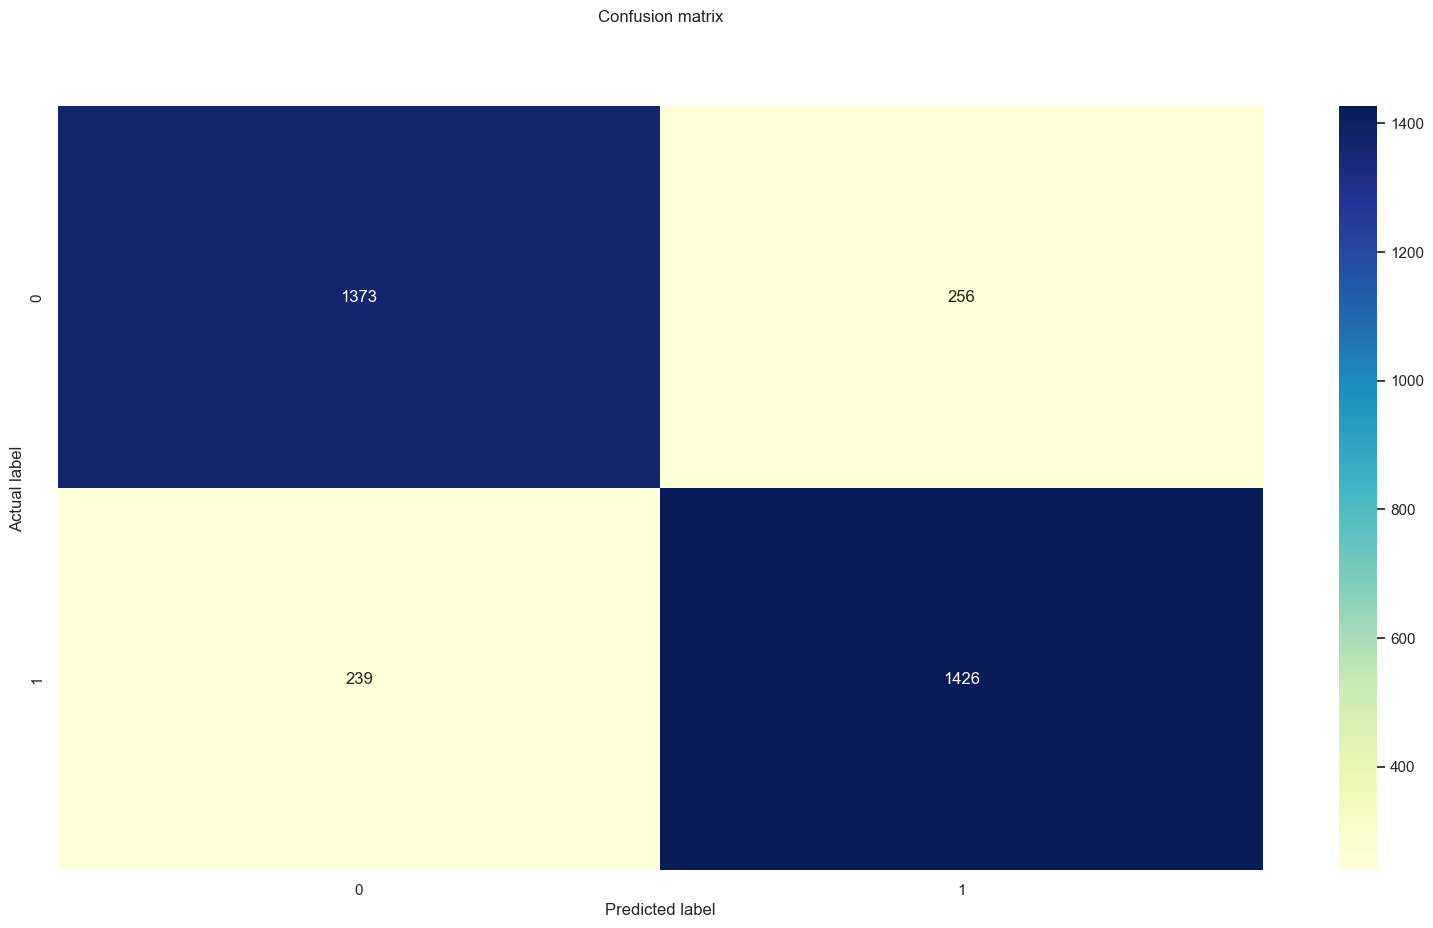

In [87]:
plot_conf_matrix(ytest, pred_test_rf, class_names)

AUC:  0.9301304988229481


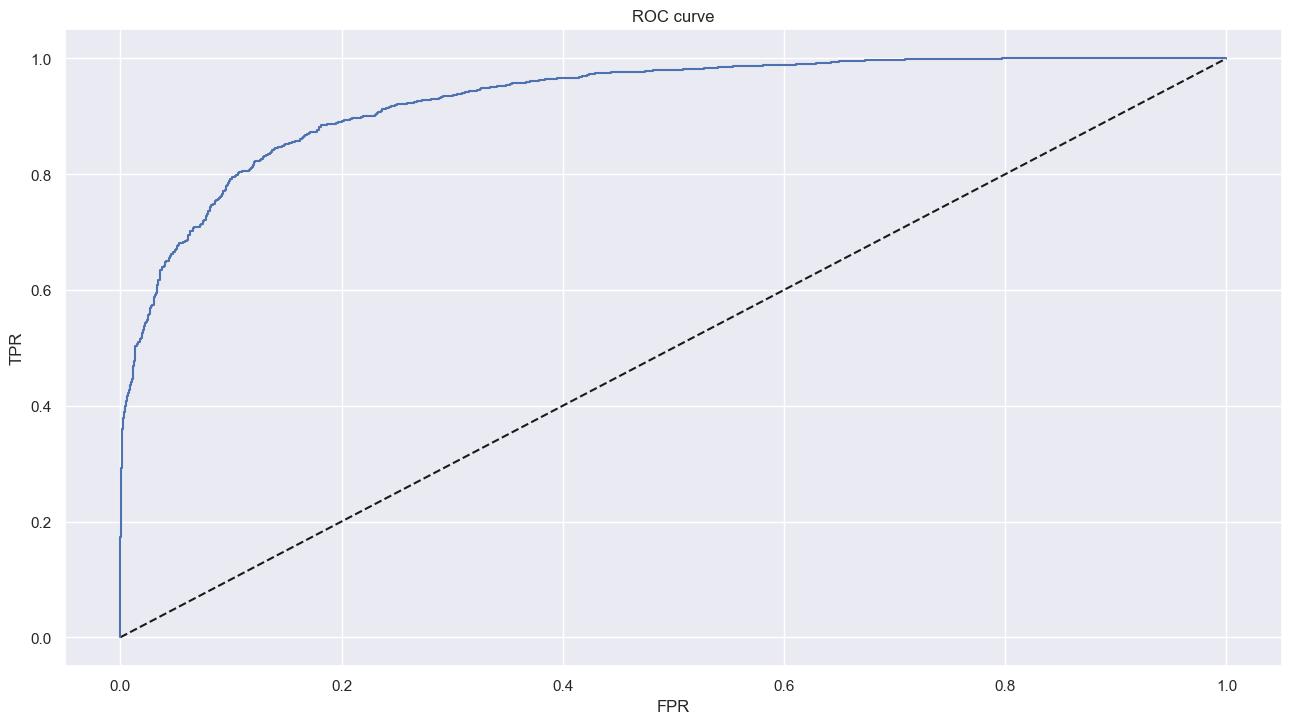

In [88]:
plot_roc(clf_rf,xtest,ytest)

The best hyperparameters of random forest model are 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100. From the classification report we can see that the model accuracy is 85% with 85% precision of 0 class and 85% precision of 1 class. and From the confusion matrix we can see that the model correctly classified 2799 files and only miss classified 495 files. The ROC curves indicate that the a good AUC value that 93%

### 6- Logistic Regression Multi-Layer Perceptron 

**Hyperparameter**

The most important hyperparameters of MLP are:
- hidden_layer_sizes: This option specifies how many hidden layers there are and how many neurons each hidden layer contains. It requires a tuple, each of whose elements denotes the quantity of neurons in that layer. For instance, (100,) designates a single hidden layer with 100 neurons, while (100, 50) designates two hidden layers, each with 100 neurons.
- activation: The activation function to employ in the hidden layers is specified by this parameter. The terms "logistic" (sigmoid), "relu" (rectified linear unit), and "tanh" (hyperbolic tangent) are frequently used.
- solver: The weight optimization algorithm is chosen by the solver parameter. Lbfgs, SGD (stochastic gradient descent), and Adam are a few alternatives. Smaller datasets should use "lbfgs," whereas larger datasets should use "adam," which is the default option.
- Alpha is an L2 regularization parameter that discourages heavy weights in order to avoid overfitting.
- Determines the schedule for the learning rate. Constant, inverse scaling, and adaptive are available options. Constant employs a set learning rate, invscaling reduces learning rate gradually, and adaptive maintains constant learning rate unless loss increases, in which case learning rate drops.
- The most iterations or epochs for which the model will be trained are indicated by the parameter max_iter.

To find the best values of these hyper parameters grid search is applied. Grid search is used with cross validation technique to find the best set of hyper-parameter values.

In [89]:
from sklearn.neural_network import MLPClassifier

In [90]:
mlp = MLPClassifier()

# Define the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(10,),(15,),(20,)],
    'activation': ['logistic'],
    'solver': ['lbfgs',],
    'alpha': [0.0005,0.001, 0.01],
}

# Perform grid search
grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'activation': 'logistic', 'alpha': 0.0005, 'hidden_layer_sizes': (20,), 'solver': 'lbfgs'}
Best Score: 0.8666118010140348


In [91]:
clf_mlp = grid_search.best_estimator_
clf_mlp

MLPClassifier(activation='logistic', alpha=0.0005, hidden_layer_sizes=(20,),
              solver='lbfgs')

In [92]:
pred_test_mlp=clf_mlp.predict(xtest)

In [93]:
classification_report(clf_mlp)

============================== Model Evaluation ==============================
Classifier : MLPClassifier(activation='logistic', alpha=0.0005, hidden_layer_sizes=(20,),
              solver='lbfgs')

 Model Accuracy:
 0.8712811171827566

Confusion matrix:
 [[1400  229]
 [ 195 1470]]

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1629
           1       0.87      0.88      0.87      1665

    accuracy                           0.87      3294
   macro avg       0.87      0.87      0.87      3294
weighted avg       0.87      0.87      0.87      3294



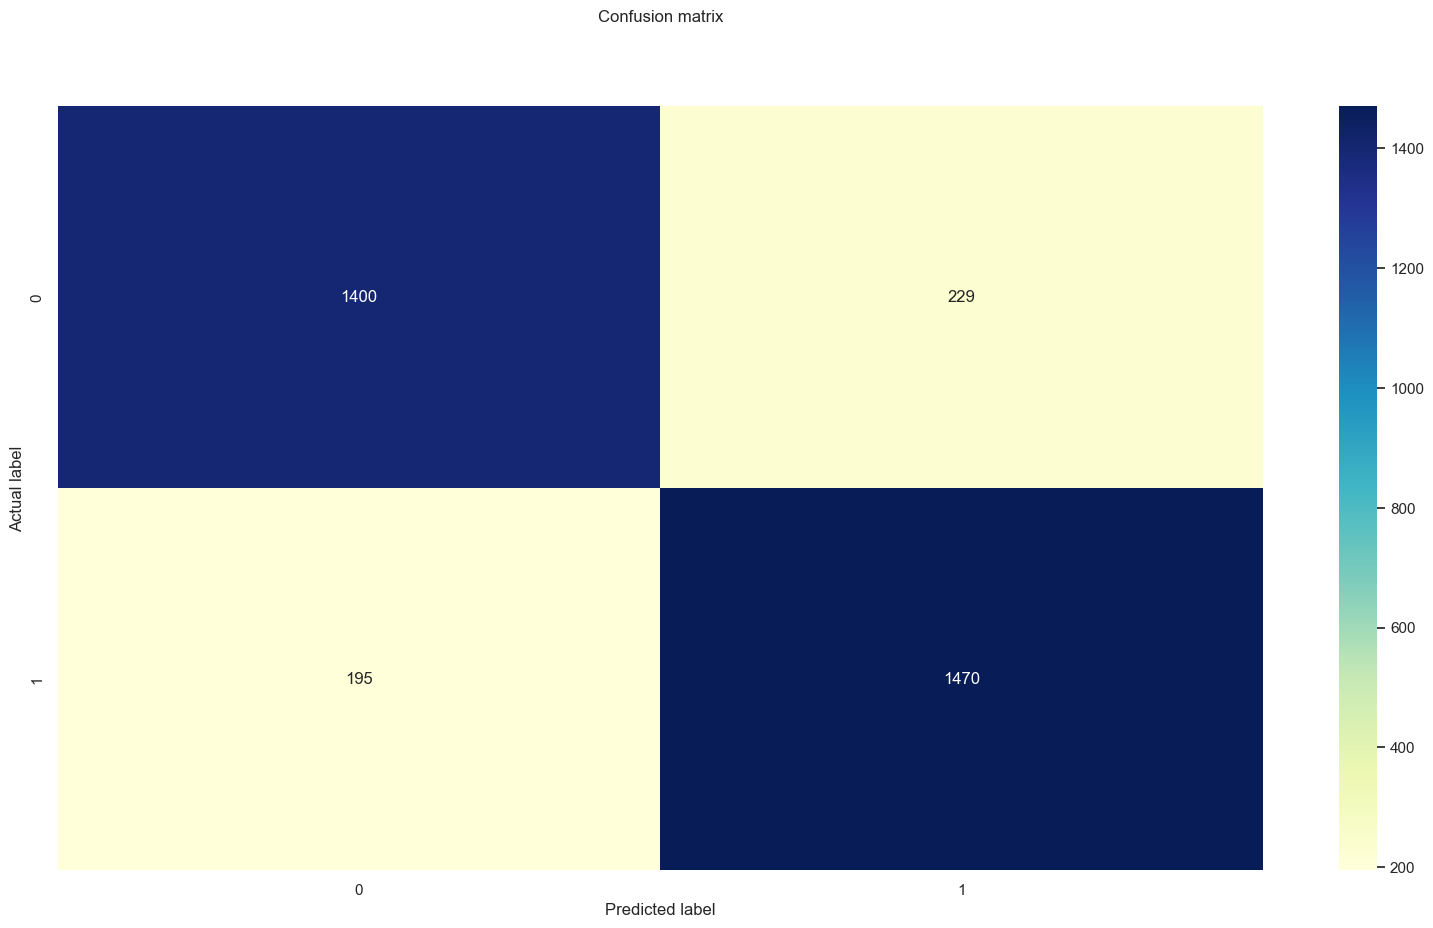

In [94]:
plot_conf_matrix(ytest, pred_test_mlp, class_names)

AUC:  0.9375832554469755


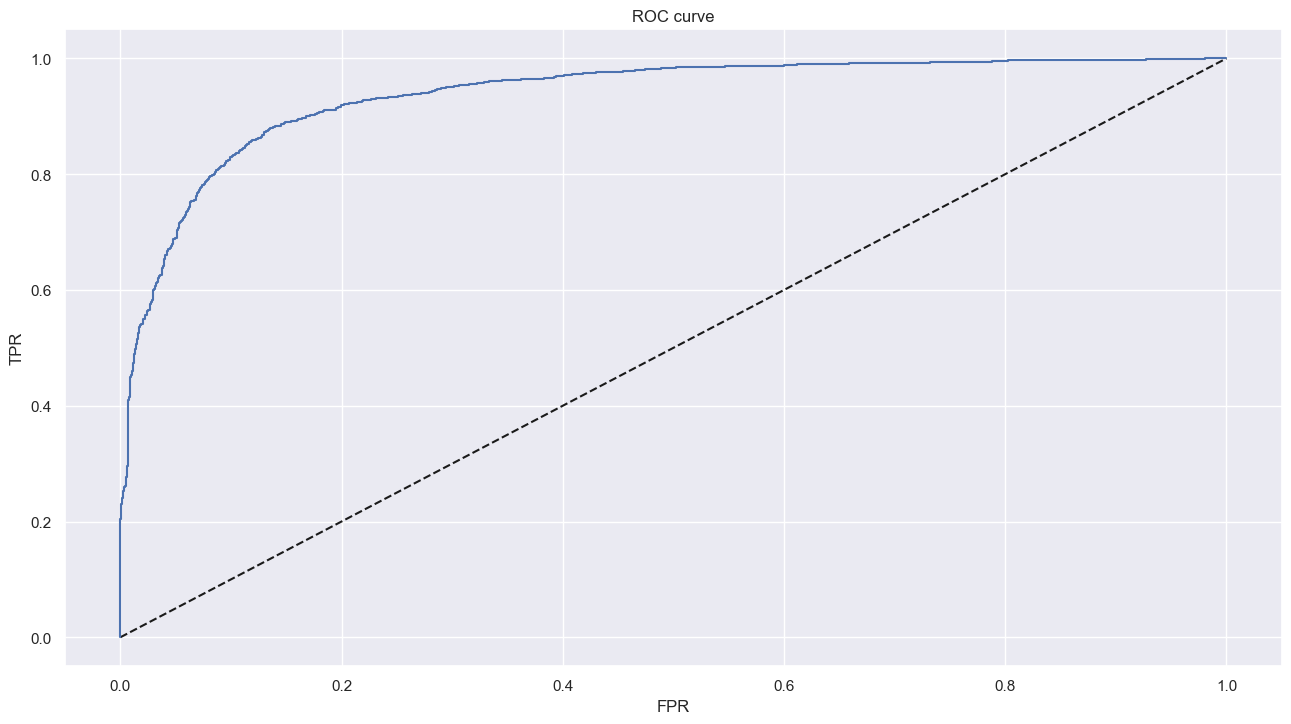

In [95]:
plot_roc(clf_mlp,xtest,ytest)

The best hyperparameters of MLP Classifier model are 'activation': 'logistic', 'alpha': 0.0005, 'hidden_layer_sizes': (20,), 'solver': 'lbfgs'. From the classification report we can see that the model accuracy is 87.1% with 88% precision of 0 class and 87% precision of 1 class. and From the confusion matrix we can see that the model correctly classified 2870 files and only miss classified 424 files. The ROC curves indicate that the a good AUC value that 94%. and this model does not overfit the dataset.

And to further improve the this MLP model we should try to increase the hidden layer units, as the grid search picks the highest number of units as the best choice, this mean to further improve the model we should increase the hidden layers units.

Among all of the model implemented this is the best performing model. with highest accuracy and AUC values. and lowest number of miss classified values.
Lets look at the feature importance of this model

### Feature Importance of MLP Classifier

In [96]:
feature_names = x.columns.tolist()[:-2]

In [97]:
weights = clf_mlp.coefs_[0]

# Calculate the feature importances
importances = np.abs(weights).sum(axis=0)

# Normalize the importances
importances /= importances.sum()

# Sort the importances in descending order
sorted_indices = np.argsort(importances)[::-1]

In [98]:
imp = pd.DataFrame(feature_names,columns=['Features'])
imp['importance'] = importances
imp = imp.sort_values(by='importance',ascending=False)
imp.style.background_gradient(cmap='Greens')

,Features,importance
7,has_signature,0.069961
8,has_tls,0.066784
12,urls,0.063719
6,has_resources,0.060615
2,imports,0.060342
18,file_type_prob_trid,0.056085
0,size,0.055929
9,symbols,0.054451
10,numstrings,0.054422
19,A,0.053287


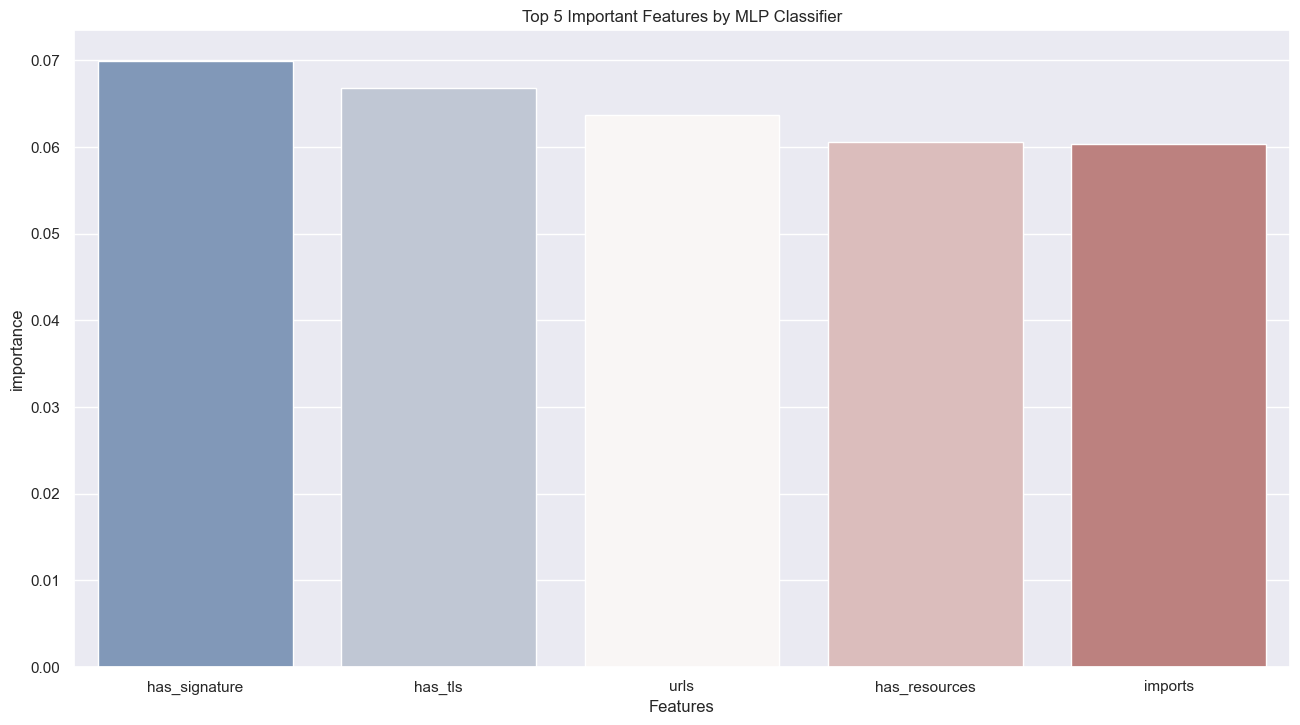

In [99]:
sns.barplot(x='Features',y='importance', 
           data = imp[:5], palette = 'vlag').set(
    title='Top 5 Important Features by MLP Classifier');

The above plot shows the top 5 most important features that have the highest impact on the target variable that is the label. In the context of dataset, these 5 variables have the highest impact on whether the file is malicious or not.

## PREDICTION

Here we will create the pipeline of the whole analysis, which will first clean the dataset and apply ML model over it.

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [101]:
def pipeline(train_file, test_file, prediction_file):
    # Load the train and test data
    train_data = pd.read_csv(train_file)
    test_data = pd.read_csv(test_file)
    final_df = test_data.copy()
    
    train_data['file_type_trid'] = label_encoder.fit_transform(train_data['file_type_trid'])
    train_data['C'] = label_encoder.fit_transform(train_data['C'])
    test_data['file_type_trid'] = label_encoder.fit_transform(test_data['file_type_trid'])
    test_data['C'] = label_encoder.fit_transform(test_data['C'])
    del train_data['sha256']
    del test_data['sha256']
    

    # Split the train data into train and validation sets
    train_samples, validation_samples = train_test_split(train_data, test_size=0.2, random_state=42)

    # Separate the features and target variables
    X_train = train_samples.drop('label', axis=1)
    y_train = train_samples['label']
    X_validation = validation_samples.drop('label', axis=1)
    y_validation = validation_samples['label']

    # Define the pipeline
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=22)),
        ('classifier', MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(20,),
              solver='lbfgs'))
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the validation data
    y_pred = pipeline.predict(X_validation)

    # Evaluate the model on the validation data
    accuracy = accuracy_score(y_validation, y_pred)
    print("Validation Accuracy:", accuracy)

    # Make predictions on the test data
    y_pred_proba = pipeline.predict_proba(test_data)

    # Extract the probabilities for the positive class (class index 1)
    positive_class_proba = y_pred_proba[:, 1]

    # Save the predictions to a file
    final_df['predict_proba'] = positive_class_proba
    result_df = final_df[['sha256','predict_proba']]
    display(result_df)
    result_df.to_csv(prediction_file, index=False)

In [102]:
train_file = 'train.csv'
test_file = 'test.csv'
prediction_file = 'predictions.csv'
pipeline(train_file, test_file, prediction_file)

Validation Accuracy: 0.8430833333333333


,sha256,predict_proba
0,023928c14abe04196d45bb4578b8fa0eb02189898ce93b...,0.830365
1,6436083d4eed84436768d66829b961927eeb9de2e6657f...,0.370547
2,038e71f41fdc5edb3a7afc112fb0679a4a5d6d94512055...,0.535231
3,be913ef29b4566e7817a5ab2c4a4289a455e9b562e1da0...,0.026909
4,e78f83f0af4f1fbcf8fffd562b4734701483818078bf0e...,0.018234
...,...,...
17995,977bc37677535028ae8bc98a585e05e59dcf2c4cb55636...,0.644528
17996,2c4c5ab9fc53e99f6416547ca9659f954a4af84008b801...,0.008273
17997,7bd4c102d52df73710982d29ebf3c68bc2d249459fc536...,0.026948
17998,4228f0379f41d4b2d50643885474ac77a3ff1719971812...,0.296001
